# **Sequence Processing with Deep learning**

In [1]:
!python -m pip install --upgrade pip setuptools wheel

In [2]:
!pip install --upgrade "tensorflow[and-cuda]==2.19.1" "keras==3.6.0" "ml-dtypes==0.5.1" keras-hub --only-binary=:all:

INFO: pip is looking at multiple versions of keras-hub to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 MB 47.4 MB/s  0:00:06m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 142.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 120.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.3/363.3 MB 40.4 MB/s  0:00:06m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 121.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 136.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.7/895.7 kB 103.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.2/577.2 MB 41.7 MB/s  0:00:08m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 MB 135.3 MB/s  0:00:010:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━

# **1. Approach**

## **1.1 Setup & Imports**

In [3]:
import tensorflow as tf
import keras
import keras_hub

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print("\nAll devices:")
print(tf.config.list_physical_devices())

print("\nTensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("KerasHub version:", keras_hub.__version__)

2025-10-16 08:01:12.332384: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-16 08:01:12.500592: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760601672.519116    6772 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760601672.524758    6772 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760601672.538846    6772 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Num GPUs Available:  1

All devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

TensorFlow version: 2.19.1
Keras version: 3.6.0
KerasHub version: 0.21.1


In [4]:
import os

print("JSONL present:", os.path.exists("A2_train_v3.jsonl"))
print("Images folder present:", os.path.exists("A2_Images"))

# Count how many images are inside
if os.path.exists("A2_Images"):
    print("Number of images:", len(os.listdir("A2_Images")))

JSONL present: True
Images folder present: True
Number of images: 19573


## **1.2 Exploratory Data Analysis (EDA)**

In [5]:
import json
import pandas as pd

records = []
with open("A2_train_v3.jsonl", "r") as f:
    for line in f:
        records.append(json.loads(line))

# Create DataFrame
df = pd.DataFrame(records)
print("Data loaded successfully!")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Display a few rows
df.head()

Data loaded successfully!
Shape: (39129, 4)

Columns: ['Image_ID', 'Label', 'Hypothesis', 'Premise']


Image_ID          Label                                       Hypothesis  \
0  4564320256     entailment              The old woman and a girl are bored.   
1  4564320256  contradiction         Two old men robbing a convenience store.   
2  4564320256  contradiction            A man implies that he is very strong.   
3  3945005060  contradiction  People rubbing sticks to start a fire in a pit.   
4   369186134     entailment                         Dogs are out in the snow   

                                             Premise  
0  An old woman and a young girl are sitting arou...  
1  An old lady and her granddaughter working in a...  
2         Two women sitting down reading newspapers.  
3          Three people at a library with computers.  
4       Three dogs next to a blue fence in the snow.

This dataset has 39,129 entries organized into four main categories: Image_ID, Label, Hypothesis, and Premise. Every record shows two text statements that connect to a picture, and they're marked as either supporting each other or conflicting. Looking at the examples, you can see there are lots of different ways these relationships work depending on the situation, which makes sense since this task requires understanding both what you see in images and how language works.

Matplotlib is building the font cache; this may take a moment.
/tmp/ipykernel_6772/748747677.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Label", palette="coolwarm")


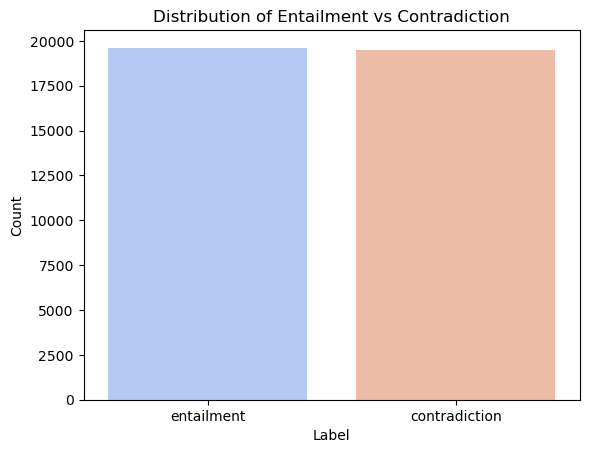

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Label", palette="coolwarm")
plt.title("Distribution of Entailment vs Contradiction")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


The bar chart shows that our dataset is well balanced, meaning we have roughly the same number of samples for both classes. This balance matters because it helps prevent the model from favouring one label over another, which means it can get better at predicting both classes accurately.

The code underneath the chart displays a few examples from the dataset so that we can inspect the type of images we are given. Investigating the sample data is a key part of the EDA because guide decisions regarding data cleaning and eventually how the model would be trained.

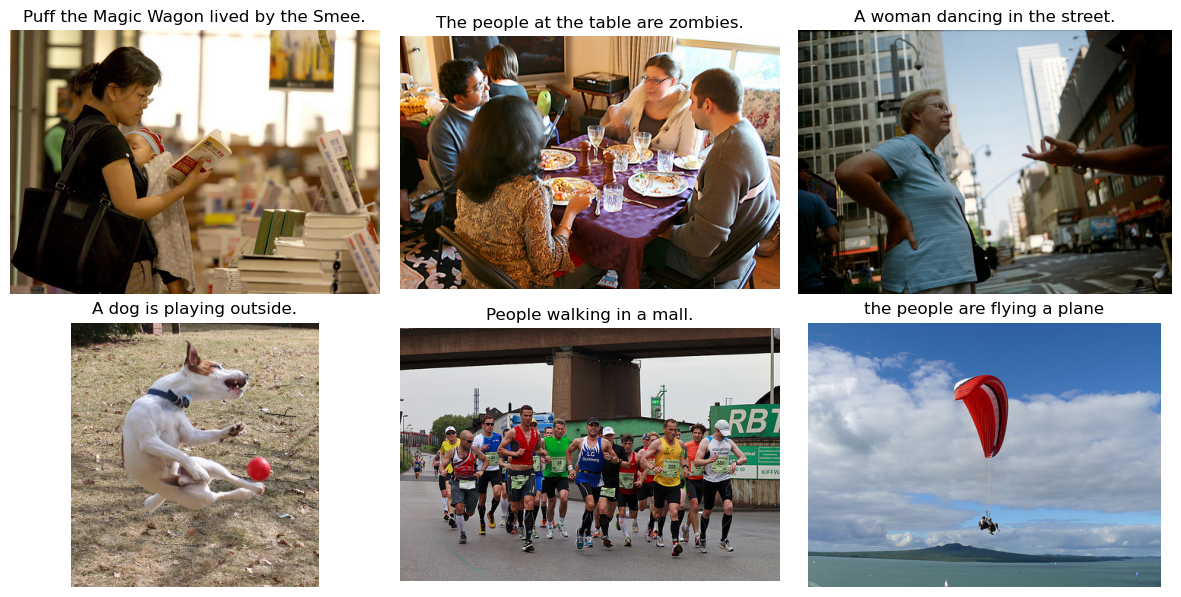

In [7]:
import os, random
from PIL import Image
import matplotlib.pyplot as plt

# Randomly select 6 samples from the dataframe
sample_ids = random.sample(list(df["Image_ID"]), 6)

plt.figure(figsize=(12, 6))
for i, img_id in enumerate(sample_ids):
    # Construct the image path based on the Image_ID
    path = os.path.join("A2_Images", f"{img_id}.jpg")

    img = Image.open(path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(df.loc[df["Image_ID"] == img_id, "Hypothesis"].values[0])
    plt.axis("off")

plt.tight_layout()
plt.show()

The sample images shown above demonstrate that the dataset contains high quality and visually diverse photographs. Scenes include both indoor and outdoor environments with varied lighting, textures, and colours, as well as different human poses and object compositions, such as the ball and parachute. This confirms that the images are contextually rich and visually complex, requiring a model capable of recognising diverse spatial and textural patterns. It can also be observed that certain images focus on primary components such as the first image, which blurs the background, in such scenarios the model may find it difficult to interpret less prominent areas if they do contribute to the correct entailment/contradiction.

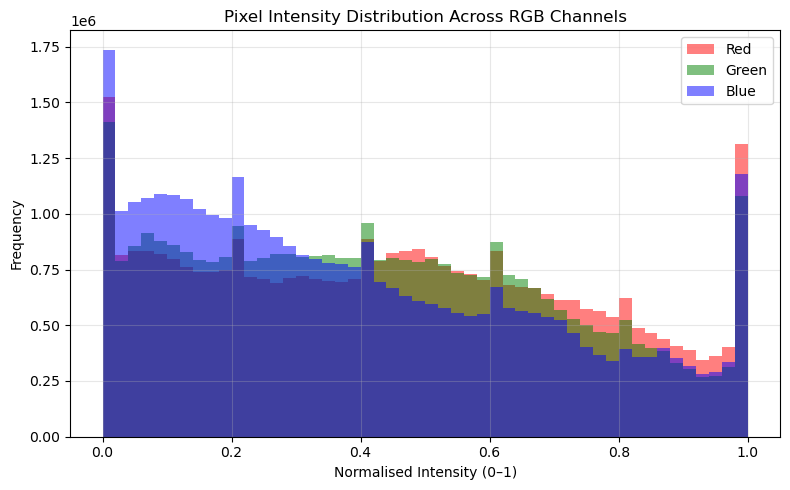

In [8]:
import numpy as np

sample_ids = random.sample(list(df["Image_ID"]), 200)  # sample 200 images for speed
pixel_values = []

for img_id in sample_ids:
    path = os.path.join("A2_Images", f"{img_id}.jpg")
    img = Image.open(path).convert("RGB")  # ensure RGB format
    img_array = np.array(img) / 255.0       # normalise pixel values to 0–1
    pixel_values.append(img_array.reshape(-1, 3))  # flatten to (N, 3)

pixels = np.concatenate(pixel_values, axis=0)

# Plot pixel intensity distributions for RGB channels
plt.figure(figsize=(8, 5))
plt.hist(pixels[:, 0], bins=50, alpha=0.5, color='r', label='Red')
plt.hist(pixels[:, 1], bins=50, alpha=0.5, color='g', label='Green')
plt.hist(pixels[:, 2], bins=50, alpha=0.5, color='b', label='Blue')
plt.title("Pixel Intensity Distribution Across RGB Channels")
plt.xlabel("Normalised Intensity (0–1)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The pixel intensity distribution shows a broad spread of pixel values across the RGB channels, demonstrating strong variation in brightness, contrast, and colour across the dataset. This visual diversity implies that the image encoder must handle a wide range of illumination and texture conditions without overfitting to specific lighting patterns. Consequently, models that have been pre-trained on diverse datasets, including ResNet50 or EfficientNet, are particularly appropriate for this application, given that they can generalise successfully to unique images.

The lack of major exposure irregularities or visual distortions suggests that standard normalisation methods consistent with ImageNet preprocessing approaches would be appropriate, thus allowing the encoder to focus on meaningful spatial and textural features. Overall, these results indicate that an advanced pre-trained convolutional encoding framework with proven transfer learning abilities would provide a solid foundation for extracting reliable visual feature representations from the dataset.

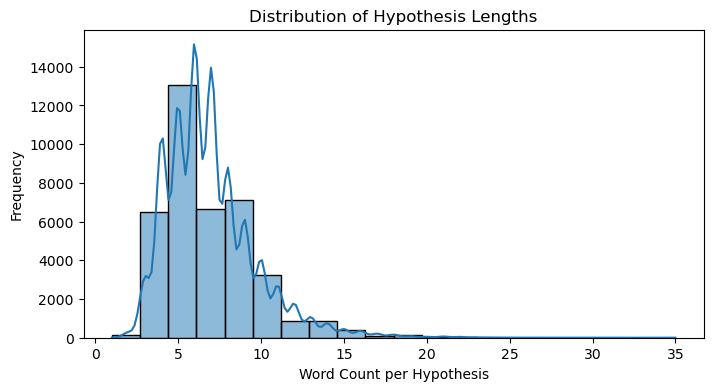

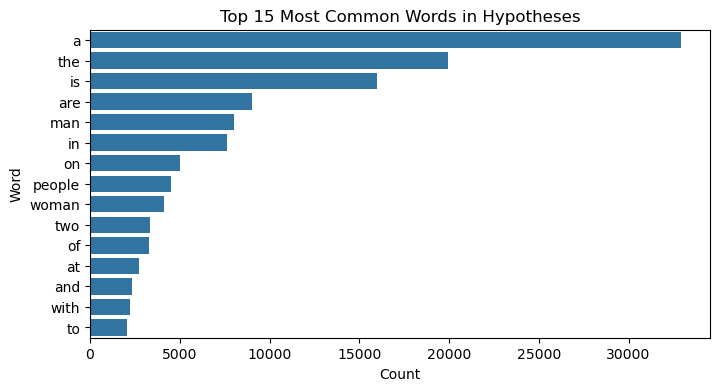

In [9]:
from collections import Counter
import seaborn as sns

# Token length distribution
hyp_lengths = [len(text.split()) for text in df["Hypothesis"]]
plt.figure(figsize=(8, 4))
sns.histplot(hyp_lengths, bins=20, kde=True)
plt.title("Distribution of Hypothesis Lengths")
plt.xlabel("Word Count per Hypothesis")
plt.ylabel("Frequency")
plt.show()

# Most common words
words = " ".join(df["Hypothesis"]).lower().split()
common_words = Counter(words).most_common(15)
common_df = pd.DataFrame(common_words, columns=["Word", "Count"])

plt.figure(figsize=(8, 4))
sns.barplot(x="Count", y="Word", data=common_df)
plt.title("Top 15 Most Common Words in Hypotheses")
plt.show()

The distribution of hypothesis lengths shows that most sentences contain between five and fifteen words, with very few exceeding twenty. This confirms that the textual inputs are short, simple, and grammatically straightforward, suggesting that they do not require the deep contextual capacity of large transformer models such as BERT. Instead, a recurrent model such as a Bidirectional LSTM (Bi-LSTM) would be sufficient to capture the limited sequential dependencies within these short sentences while remaining computationally efficient.

The vocabulary analysis highlights that the most common words are basic content words such as a, the, is, man, and woman. These are typical of descriptive statements that directly reference clearly visible parts of an image. The limited and repetitive nature of this vocabulary further implies that a lightweight text encoder with a smaller embedding size would be appropriate, avoiding the complexity of large-scale transformers. This would also allow for a higher performance on this dataset, and similar data.

Together, these findings indicate that a simple recurrent architecture is likely to perform effectively on this dataset while maintaining efficiency such as a LSTM model.

## **1.3 Summary of Insights**
- The dataset shows a balanced distribution of the entailment and the contradiction, meaning that no class weighting is necessary.
- The pixel instensity shwos a broad spread across all of the RGB channels, confirming strong variation in lighting, colour, and the contrast. This would mean that augmentation and regularisation such as L2 or dropout would be able to improve generalisation. As without these techniques, the model would often memorise the specific angles, lighting and colours of the limited examples in the dataset, performing worse on patterns that are present in unseen data.
- Most hypotheses are short and contain simple sentences, therefore a maximum sequence length of 64 tokens should be able to strike a balance between the coverage and the computational efficieny.
- The hybrid nature of this tasks would imply that a fusion strength paramater such as densey layer, capacity or gating weights would be able to ensure that both the visual and textual aspects contribute to the models performance. 

# **Evaluation Framework**
## **2.1 Performance Metrics Selection & Target Value**

Two key metrics are used to evaluate the performance of the visual entailment model, accuracy and weighted average F1 score, with the validation loss providing insight into the convergence and stability of the model. Other metrics such as precision and recall will also be considered when printing out the classification report, but below are the main performance metrics which will be used.

**Accuracy** serves as the initial performance indicator because it provides a clear and straightfoward metric of the relationship between the image and the text. It is also useful during the early stages of training and hyperparameter tuning, where it helps to identify trends in learning progress when observed alongside the validation loss. 

**The Weighted Average F1 score** is also used to provide a more balanced and informative measure. It represents the harmonic mean of precision and recall, where precision measures the proportion of correctly predicted positive samples, and recall measures the proportion of correctly identified actual positives. This metric captures the model’s effectiveness across both entailment and contradiction, making it a stronger indicator of true generalisation performance than accuracy alone.

To ensure that the evaluation is properly reflected and a balanced performance is shown across both the classes, contradiction and entailment. An average of the accuracy and F1-score will be used. This is can be done in the classification report directly, so that it reflects the average performance of a metric, this is done in the next section. Using an average means that there is no bias to the majority class, as this dataset is already balanced among the classes. Alternatively, it can be done by adding the two accuracies or F1-scores and then divide it by 2.

In the research paper “Xie, Ning, et al. ”Visual entailment: A novel task for fine-grained image understanding.” arXiv preprint arXiv:1901.06706 (2019)”, the proposed Explainable Visual Entailment model achieved an overall accuracy of approximately 0.71 on the full three-class SNLI-VE dataset. Since the model developed in this assignment is based on a simplified binary classification task that excludes the neutral class the options are less ambiguous and therefore the task is less complex leading to a higher performance target compared to the 0.71.

Taking these factors into account, a target accuracy of around 0.75 and a weighted average F1 score of 0.75 is the target. This represents a four percent increase in performance over the research papers performance, keeping in mind that the current dataset is smaller and may not capture all possible patterns and features. Meeting this target would demonstrate that the model effectively learns the relationship between visual and textual features and can generalise beyond the training data despite the reduced sample size we are working with.

## **2.2 Plotting, Evaluation & Helper Functions**

There are five methods in the following cell. The first method is to plot the learning curves; The second
is to evaluate the model printing the accuracy values based on the validation data; The third is to print
the classification reports where the F1-Score can be seen; The fourth is to display a confusion matrix; The
fifth is a function to for a t-SNE visualisation.

In [10]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.manifold import TSNE

def evaluate_model(model, test_ds):
    y_true, y_pred = [], []

    for x_batch, y_batch in test_ds:
        preds = model.predict(x_batch, verbose=0)
        y_true.extend(y_batch.numpy())
        y_pred.extend(np.argmax(preds, axis=1))

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"Accuracy:  {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall:    {rec:.3f}")
    print(f"F1-score:  {f1:.3f}")
    print("Confusion Matrix:\n", cm)

    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

def plot_learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy (Baseline Model)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training vs Validation Loss (Baseline Model)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def print_classification_report(model, val_ds):
    y_true, y_pred = [], []
    for batch in val_ds:
        x_batch, y_batch = batch
        preds = model.predict(x_batch, verbose=0)
        y_true.extend(y_batch.numpy())
        y_pred.extend(np.argmax(preds, axis=1))  # for softmax output
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    report = classification_report(
        y_true, y_pred,
        target_names=["Contradiction", "Entailment"],
        digits=3
    )
    print("Classification Report:\n")
    print(report)

def plot_confusion_matrix(model, test_ds):
    y_true, y_pred = [], []
    for x_batch, y_batch in test_ds:
        preds = model.predict(x_batch, verbose=0)
        y_true.extend(y_batch.numpy())
        y_pred.extend(np.argmax(preds, axis=1))

    cm = confusion_matrix(y_true, y_pred)
    labels = ["Contradiction", "Entailment"]

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix (Gated Model)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

def plot_tsne_embeddings(model, ds, num_samples=1000):
    feature_extractor = tf.keras.Model(
        inputs=model.inputs,
        outputs=model.get_layer(index=-3).output
    )

    embeddings, labels = [], []
    for x_batch, y_batch in ds.take(num_samples // 16):
        feats = feature_extractor.predict(x_batch, verbose=0)
        embeddings.append(feats)
        labels.extend(y_batch.numpy())

    X = np.vstack(embeddings)
    y = np.array(labels)

    tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
    X_embedded = tsne.fit_transform(X)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        X_embedded[:, 0], X_embedded[:, 1],
        c=y, cmap="coolwarm", alpha=0.6
    )
    plt.title("t-SNE Visualisation of Fused Embeddings")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend(handles=scatter.legend_elements()[0], labels=["Contradiction", "Entailment"])
    plt.tight_layout()
    plt.show()

## **2.3 Data Loader Including Data Splitting**

The dataset is first split into training, validation, and testing respectively to ensure that the model can learn as many features as possible, while retaining enough data to be able to fairly evalute the models performance and to guide optimisation. The train_test_split function is used to divide the data in an 80–20 ratio, after which the 20 per cent set is further divided evenly to create validation and test sets (resulting in a final 80–10–10 split).

A random seed of 42 is applied to maintain reproducibility so that the same samples are used in each rerun. Stratification by class labels guarantees that both entailment and contradiction are proportionally represented across all subsets.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

label_map = {"entailment": 0, "contradiction": 1}
df["LabelEncoded"] = df["Label"].map(label_map)

# 80/10/10
train_df, temp_df = train_test_split(
    df, test_size=0.2, stratify=df["LabelEncoded"], random_state=42
)
val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df["LabelEncoded"], random_state=42
)

print(f"Train size: {len(train_df)}, Val size: {len(val_df)}, Test size: {len(test_df)}")
print(train_df["LabelEncoded"].value_counts(normalize=True))

Train size: 31303, Val size: 3913, Test size: 3913
LabelEncoded
0    0.50139
1    0.49861
Name: proportion, dtype: float64


The code contained in the cell below represents the data processing pipeline. Every label undergoes conversion from textual format to numerical representation through a straightforward mapping system, where entailment receives the value 0 whilst contradiction receives the value 1. This transformation enables the neural network to handle categorical data numerically throughout the training process.

Following this, the code constructs an extensive TensorFlow data pipeline using the tf.data.Dataset API. Each image path gets matched with its corresponding text and label, while a BERT tokeniser converts textual hypotheses into token sequences of predetermined lengths. The tokeniser also generates an attention mask, allowing the model to focus on important tokens while ignoring padded components.

Images are loaded and prepared through a dedicated function that opens the file, converts it to an RGB format, and resizes it to 224×224 pixels, which matches the required input size for the ResNet50 architecture. During training mode, data augmentation gets implemented, incorporating random flips, rotations, and zooms to enhance the model's ability for generalisation across varied visual settings. Following preprocessing, pixel values are  normalised using the preprocess_input function to align with the numerical range used by ResNet50's pre-trained weights.

In the final stage, the dataset is organised into batches and prefetched to enable optimal GPU utilisation and enhanced training speed. This process ensures that each batch contains both the processed image tensors and their corresponding tokenised text, allowing the model to learn coordinated visual and textual representations efficiently.

Synonym augmentation and random word deletion were excluded (though considered) as both techniques might compromise the exact meaning of brief hypotheses, resulting in inaccurate entailment or contradiction labels. The dataset maintains balance and semantic sensitivity already, therefore modifying or removing words would generate noise and diminish model accuracy instead of enhancing generalisation.

In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os, random
from tensorflow.keras.applications.resnet import preprocess_input
from keras_hub.models import BertTokenizer

SEED = 42
IMG_SIZE = 224
MAX_TOKENS = 64
BATCH_SIZE = 16
AUTOTUNE = tf.data.AUTOTUNE

tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

IMG_DIR = "./A2_Images"

for d in [train_df, val_df, test_df]:
    d["Image_Path"] = d["Image_ID"].apply(lambda x: os.path.join(IMG_DIR, f"{x}.jpg"))


tokenizer = BertTokenizer.from_preset("bert_base_en_uncased")

def tokenize_hypothesis(text):
    tokens = tokenizer.tokenize(text)
    tokens = tokens[:MAX_TOKENS]
    pad_len = tf.maximum(0, MAX_TOKENS - tf.shape(tokens)[0])
    tokens = tf.pad(tokens, [[0, pad_len]])
    valid_len = tf.minimum(tf.shape(tokens)[0], MAX_TOKENS)
    attention_mask = tf.concat([
        tf.ones(valid_len, dtype=tf.int32),
        tf.zeros(MAX_TOKENS - valid_len, dtype=tf.int32)
    ], axis=0)
    return tokens, attention_mask

augment = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

def load_and_preprocess_image(image_path, training=False):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    if training:
        image = augment(image)
    image = preprocess_input(image)
    return image


def process_sample(image_path, text, label, training=False):
    image = load_and_preprocess_image(image_path, training)
    token_ids, attention_mask = tokenize_hypothesis(text)
    inputs = {"image": image, "input_ids": token_ids}
    return inputs, tf.cast(label, tf.int32)

def make_ds(df, training=False):
    paths = tf.constant(df["Image_Path"].values)
    texts = tf.constant(df["Hypothesis"].values)
    labels = tf.constant(df["LabelEncoded"].values, dtype=tf.int32)
    ds = tf.data.Dataset.from_tensor_slices((paths, texts, labels))
    ds = ds.map(lambda p, t, l: process_sample(p, t, l, training), num_parallel_calls=4)
    if training:
        ds = ds.shuffle(buffer_size=min(len(df), 1000), seed=SEED)
    ds = ds.batch(BATCH_SIZE).prefetch(4)
    return ds


train_ds = make_ds(train_df, training=True)
val_ds = make_ds(val_df)
test_ds = make_ds(test_df)


for inputs, labels in train_ds.take(1):
    print("Pipeline Ready —")
    print("Image batch:", inputs["image"].shape)
    print("Token batch:", inputs["input_ids"].shape)
    print("Labels:", labels.shape)

100%|██████████| 457/457 [00:00<00:00, 1.32MB/s]


100%|██████████| 761/761 [00:00<00:00, 2.96MB/s]


100%|██████████| 226k/226k [00:01<00:00, 196kB/s]
I0000 00:00:1760601740.799199    6772 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13760 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


Pipeline Ready —
Image batch: (16, 224, 224, 3)
Token batch: (16, 64)
Labels: (16,)


2025-10-16 08:02:31.622395: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# **3. Model Selection & Justification**
## **3.1 Base Model Selection & Justifiation**

The aim of this model is to be able to solve the advanced visual entailment task, given a premise image and a hypothesis sentence to then being able to accurately predic the relationship. The baseline model uses a simple concatenation method to be able to join together both the textual and image encoders. 

ResNet50 was selected as the visual encoder due to its demonstrated reliability, ability to generalise, and pre-training on the extensive ImageNet dataset, over others such as EfficientNet, MobileNet, and VGG16. It successfully captures visual characteristics including edges, textures, and object forms, which adapt effectively to the visual entailment challenge as diverse of images are used. The EDA confirmed that the dataset contains high-quality, varied images portraying realistic scenarios, justifying the employment of a deep convolutional architecture capable of identifying diverse visual elements.

Through setting base_cnn.trainable = False, the ResNet50 backbone remains fixed, ensuring only the newly incorporated dense layers undergo training. This approach prevents overfitting on the more limited dataset whilst enabling effective utilisation of pre-trained parameters. The Global Average Pooling layer reduces spatial characteristics into a condensed representation, whilst Dropout layers assist model generalisation by randomly disabling neurons throughout training.

A Bidirectional LSTM (Bi-LSTM) serves as the textual encoder rather than transformer architectures such as BERT. The EDA revealed that hypotheses are brief (5–15 tokens) and employ repetitive simple language, making Bi-LSTM a more efficient and suitable option. It processes contextual relationships bidirectionally without requiring the extensive parameter count or gradual convergence associated with BERT, which would be extremely time consuming. Bi-LSTM consequently provides an optimal balance amongst accuracy, reliability, and computational effectiveness for this particular dataset.

The combination of ResNet50 for visual encoding and Bi-LSTM for textual encoding allows the model to acquire visual and textual representations efficiently. The concatenation fusion approach combines these feature domains into a unified representation to determine whether the image entails or contradicts the text.

The build_visual_entailment_model_concat() function implements this baseline. The image branch uses a pre-trained ResNet50 with frozen layers, followed by a Dense layer (256 units, ReLU) and Dropout (0.3) to refine and regularise features, a moderate number of units was chosen to give the model enough capacity to be able to perform whilst not increasing run time significantly. The text branch applies an Embedding layer (128-dim) and a Bi-LSTM (128 units) with Dropout (0.3), to capture bidirectional context. Dropout is especially incorporated here in the recurrent layer which is prone to memorising short-term patterns. The two outputs are concatenated and passed through Dense layers (256 and 128 units, ReLU) with Dropout (0.3 and 0.2) for regularisation, to reduce the expected overfitting as the model combines high capacity pre-trained and trainable layers that could memorise the limited data's features and patterns. The final Dense layer (2 units, softmax) outputs class probabilities for entailment and contradiction. Softmax is used here as it is a two class problem (entailment and contradiction) and provides mutually exclusive probabilities between the classes.

The model is compiled with the Adam optimiser (learning rate = 2e-5) to ensure stable learning and smooth convergence, using sparse categorical cross-entropy as the loss function and accuracy as the primary evaluation metric due to the balanced class distribution. Adam was selected because it adaptively adjusts the learning rate for each parameter making it highly effective for models that combine pre-trained and trainable components. The Sparse categorical cross-entropy loss function is well suited for binary classification tasks involving integer encoded labels. This function calculates the discrepancy between the model's predicted probability distributions and the actual class labels, guiding the learning process to enhance both precision and recall performance for entailment and contradiction classifications.

In [14]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications.resnet import ResNet50

EPOCHS_BASE = 5
LEARNING_RATE = 2e-05
IMG_SIZE = 224
MAX_TOKENS = 64

def build_visual_entailment_model_concat():
    base_cnn = ResNet50(
        include_top=False,
        weights="imagenet",
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    base_cnn.trainable = False

    image_input = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3), name="image")
    image_features = base_cnn(image_input)
    image_features = layers.Dense(256, activation="relu")(image_features)
    image_features = layers.Dropout(0.3)(image_features)

    vocab_size = 30522
    embed_dim = 128
    lstm_units = 128
    input_ids = layers.Input(shape=(MAX_TOKENS,), dtype=tf.int32, name="input_ids")
    x = layers.Embedding(vocab_size, embed_dim, mask_zero=True)(input_ids)
    x = layers.Bidirectional(layers.LSTM(lstm_units))(x)
    text_features = layers.Dropout(0.3)(x)

    fused = layers.Concatenate()([image_features, text_features])
    fused = layers.Dense(256, activation="relu")(fused)
    fused = layers.Dropout(0.3)(fused)
    fused = layers.Dense(128, activation="relu")(fused)
    fused = layers.Dropout(0.2)(fused)

    output = layers.Dense(2, activation="softmax")(fused)

    model = models.Model(inputs={"image": image_input, "input_ids": input_ids}, outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [15]:
model = build_visual_entailment_model_concat();
history = model.fit(train_ds, validation_data=val_ds, epochs=5)

print_classification_report(model, val_ds)

Epoch 1/5


I0000 00:00:1760489471.903956   30850 cuda_dnn.cc:529] Loaded cuDNN version 90300


1957/1957 ━━━━━━━━━━━━━━━━━━━━ 279s 135ms/step - accuracy: 0.5033 - loss: 0.7558 - val_accuracy: 0.5162 - val_loss: 0.6937
Epoch 2/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 269s 135ms/step - accuracy: 0.5357 - loss: 0.6926 - val_accuracy: 0.6619 - val_loss: 0.6275
Epoch 3/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 268s 134ms/step - accuracy: 0.6643 - loss: 0.6175 - val_accuracy: 0.7225 - val_loss: 0.5588
Epoch 4/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 269s 134ms/step - accuracy: 0.7225 - loss: 0.5518 - val_accuracy: 0.7393 - val_loss: 0.5270
Epoch 5/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 268s 134ms/step - accuracy: 0.7520 - loss: 0.5102 - val_accuracy: 0.7460 - val_loss: 0.5162
Classification Report:

               precision    recall  f1-score   support

Contradiction      0.758     0.725     0.741      1962
   Entailment      0.735     0.767     0.751      1951

     accuracy                          0.746      3913
    macro avg      0.746     0.746     0.746      3913
 weighted avg      0.746     0.746     0.746

2025-10-15 01:14:06.502098: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


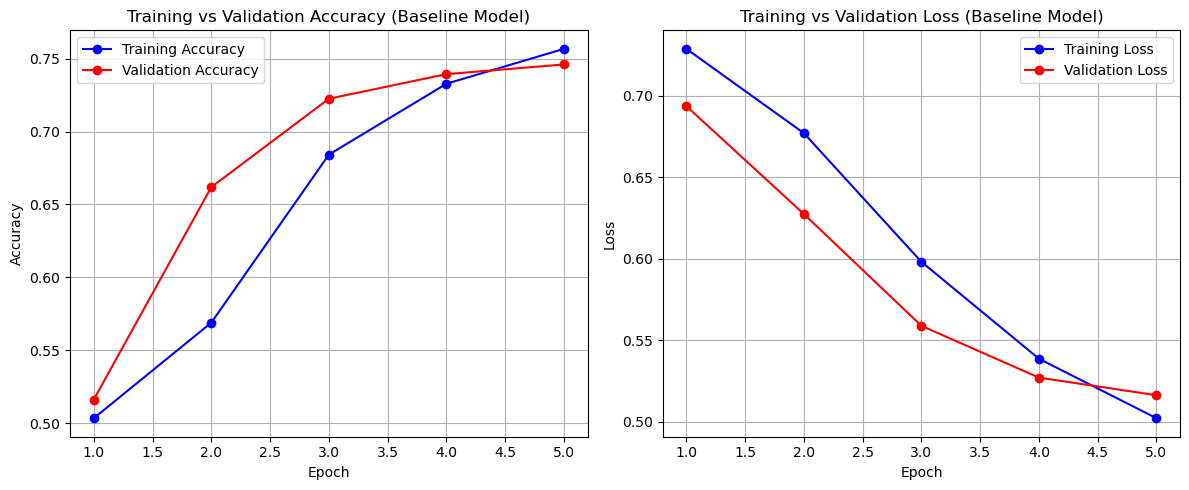

In [16]:
plot_learning_curves(history)

The baseline model using simple concatenation achived a validation accuracy of 74.6%, demonstarting that it has been able to learn meaningful features. The learning curves show steady improvements with validation accuracy performing better compared to the training curve for the first four epochs, this could be attributed to the regularisation which was included leading to underfitting. However, since the CNN layers are frozen, unfreezing and fine tuning could allow the model to capture richer visual representations and improve training performance relative to validation.

Overall, the results suggest that while the model generalises well and almost meets the performance target which we had set, its performance may be limited due to the simple concatenation fusion method, which treats visual and textual features independently rather than dynamically attributing weights based on the visual-text contributions.

## **3.2 Implementing Gated Fusion Over Simple Concatenation**

As observed from the baseline model, the performance may be increased through the use of a method beyond simple concatentation. One such method would be gated fusion. A gated fusion model is more effective than simple concatenation because it learns how much information to take from each modality (visual or textual) rather than treating image and text features equally as described to be the potential limitation in the baseline model. The gating mechanism assigns adaptive weights, allowing the model to focus more on visual cues when the image is informative and on textual cues when the hypothesis carries stronger context. This selective integration produces a more balanced and aware representation, reducing noise and improving overall accuracy compared to the static feature combination used in the concatenation model. Therefore, implementing one would benefit the models performance. 

The code cell below shows the implementation for the gated fusion, making use of the concatenated features it passes through a sigmoid gate where it then learns the weights for each of the features and controls how much information from each of the modailities is retained. This is then outputed to dense and dropout layers to learn non linear relationships and reduce possible overfitting a small value of 0.3 and 0.2 is used. Overfitting is likely to happen in the dense fusion layers, as there are multiple trainable parameters.

In [17]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications.resnet import ResNet50

EPOCHS_BASE = 5
LEARNING_RATE = 2e-05
IMG_SIZE = 224
MAX_TOKENS = 64

def build_visual_entailment_model_gated():
    base_cnn = ResNet50(
        include_top=False,
        weights="imagenet",
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    base_cnn.trainable = False

    image_input = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3), name="image")
    image_features = base_cnn(image_input)
    image_features = layers.Dense(256, activation="relu")(image_features)
    image_features = layers.Dropout(0.3)(image_features)

    vocab_size = 30522
    embed_dim = 128
    lstm_units = 128
    input_ids = layers.Input(shape=(MAX_TOKENS,), dtype=tf.int32, name="input_ids")
    x = layers.Embedding(vocab_size, embed_dim, mask_zero=True)(input_ids)
    x = layers.Bidirectional(layers.LSTM(lstm_units))(x)
    text_features = layers.Dropout(0.3)(x)

    concat = layers.Concatenate()([image_features, text_features])
    fusion_dim = concat.shape[-1]
    gate = layers.Dense(fusion_dim, activation="sigmoid")(concat)
    gated = layers.Multiply()([gate, concat])
    fused = layers.Dense(256, activation="relu")(gated)
    fused = layers.Dropout(0.3)(fused)
    fused = layers.Dense(128, activation="relu")(fused)
    fused = layers.Dropout(0.2)(fused)

    output = layers.Dense(2, activation="softmax")(fused)

    model = models.Model(inputs={"image": image_input, "input_ids": input_ids}, outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [18]:
model = build_visual_entailment_model_gated();
history = model.fit(train_ds, validation_data=val_ds, epochs=5)

print_classification_report(model, val_ds)

Epoch 1/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 278s 136ms/step - accuracy: 0.4971 - loss: 0.7153 - val_accuracy: 0.5104 - val_loss: 0.6931
Epoch 2/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 269s 135ms/step - accuracy: 0.5282 - loss: 0.6908 - val_accuracy: 0.6586 - val_loss: 0.6225
Epoch 3/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 270s 135ms/step - accuracy: 0.6669 - loss: 0.6157 - val_accuracy: 0.7214 - val_loss: 0.5564
Epoch 4/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 269s 135ms/step - accuracy: 0.7268 - loss: 0.5536 - val_accuracy: 0.7421 - val_loss: 0.5260
Epoch 5/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 269s 135ms/step - accuracy: 0.7551 - loss: 0.5115 - val_accuracy: 0.7462 - val_loss: 0.5124
Classification Report:

               precision    recall  f1-score   support

Contradiction      0.751     0.738     0.745      1962
   Entailment      0.741     0.754     0.748      1951

     accuracy                          0.746      3913
    macro avg      0.746     0.746     0.746      3913
 weighted avg      0.746     0.746

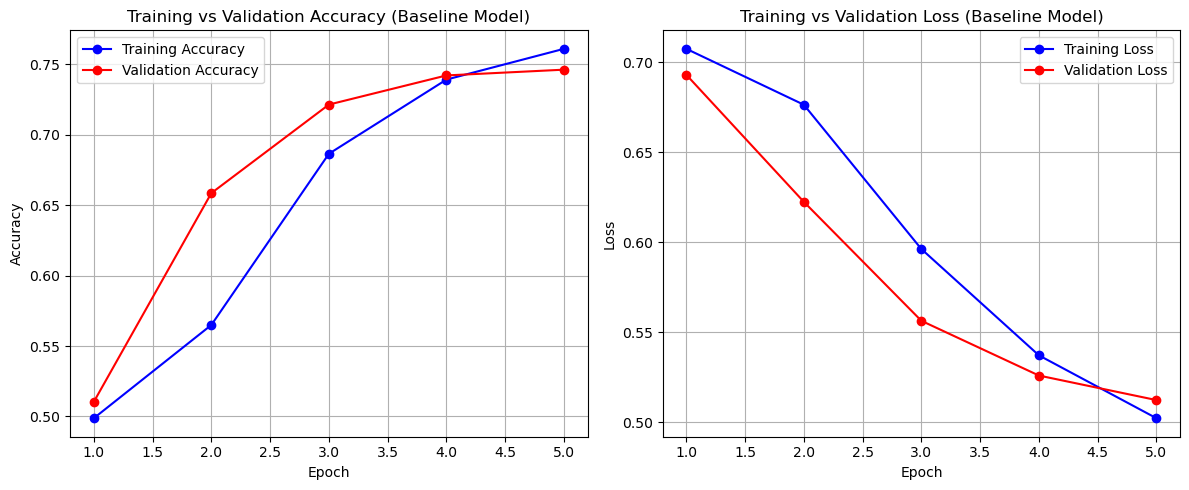

In [19]:
plot_learning_curves(history)

From the classification report and learning curves, it can be observed that the results are very similar to those of the baseline model with simple concatenation. This outcome is expected, as the gated fusion model typically outperforms simple concatenation only when some layers are unfrozen. In this case, the experiment was designed mainly to confirm that the gated fusion implementation does not perform worse than the baseline.

When both the image and text feature extractors are frozen, their outputs remain fixed and cannot adjust during training. Therefore, the gate receives static features and cannot meaningfully rebalance the contributions of each input source, in this context, the image and the sentence. In the optmisation phase, selected layers should be unfrozen and the learning rate, dropout, model capacity and L2 regularisation should be adjusted accordingly. These changes will allow the gated fusion mechanism to improve the validation performance beyond the baseline.

# **4. Model Optimisation**

## **4.1 Hyperparameter Tuning**

These five parameters were chosen to be tuned because they most directly influence the model’s learning behaviour and address the weaknesses seen in the baseline. Some of these parameters were also mentioned in the initial EDA based on oberservation made. The reasons for selecting these parameters are outlined below

- **Learning rate** determines how effectively the model updates its weights during training; a well tuned rate improves convergence and prevents the slow or unstable learning that was visible in the baseline’s early training curves.

- **Dropout fusion** avoids the clear overfitting observed in the baseline, particularly within the dense fusion layers that combine image and text features.

- **L2 regularisation** is also important because it prevents the model’s weights from growing too large, helping to reduce overfitting and improve generalisation when the network capacity and learning rate are increased during fine tuning.

- **LSTM units** is the representational capacity of the text encoder Increasing the capacit would strengthens the model’s understanding of sentence structure and meaning, which the baseline sometimes failed to capture.
- **Unfreeze layers** controls how much of the pre-trained ResNet50 is fine tuned. In the baseline, keeping all layers frozen limited the model’s ability to adapt to domain specific visual patterns, so adjusting this allows better feature refinement.


Tuning these five parameters provides the strongest control over optimisation stability, feature adaptation, and generalisation without adding unnecessary complexity.

The approach to hyperparameter tuning is outlined to be a method similar to binary search. Firstly, selecting a value, and depending on whether or not it underfits/overfits or underperforms the value is changed. This approach was chosen over the typical random search or grid search cv, as it is more time efficient. It should be noted that various parameter values were used to guage the metrics beyond the sets of parameters which were used in the code cells below. The values below were selected as they are a good representation of the approach explained earlier (more values would make it lengthier and computationally costlier).

In [20]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications.resnet import ResNet50

EPOCHS_BASE = 5
IMG_SIZE = 224
MAX_TOKENS = 64

def build_visual_entailment_model_gated_tunable(
    unfreeze_layers=75,
    learning_rate=3e-4,
    dropout_fusion=0.4,
    lstm_units=256,
    l2_reg=1e-3
):

    base_cnn = ResNet50(
        include_top=False,
        weights="imagenet",
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )

    if unfreeze_layers > 0:
        base_cnn.trainable = True
        fine_tune_at = len(base_cnn.layers) - int(unfreeze_layers)
        for layer in base_cnn.layers[:fine_tune_at]:
            layer.trainable = False
    else:
        base_cnn.trainable = False

    image_input = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3), name="image")
    image_features = base_cnn(image_input)
    image_features = layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(l2_reg))(image_features)
    image_features = layers.Dropout(0.4)(image_features)

    vocab_size = 30522
    embed_dim = 128
    input_ids = layers.Input(shape=(MAX_TOKENS,), dtype=tf.int32, name="input_ids")

    x = layers.Embedding(vocab_size, embed_dim, mask_zero=True)(input_ids)
    x = layers.Bidirectional(layers.LSTM(lstm_units))(x)
    text_features = layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(l2_reg))(x)
    text_features = layers.Dropout(0.4)(text_features)

    concat = layers.Concatenate()([image_features, text_features])
    fusion_dim = concat.shape[-1]
    gate = layers.Dense(fusion_dim, activation="sigmoid")(concat)
    gated = layers.Multiply()([gate, concat])

    fused = layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(l2_reg))(gated)
    fused = layers.Dropout(dropout_fusion)(fused)
    fused = layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(l2_reg))(fused)
    fused = layers.Dropout(0.3)(fused)

    output = layers.Dense(2, activation="softmax")(fused)

    model = models.Model(inputs={"image": image_input, "input_ids": input_ids}, outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

The tunable gated fusion model in the code cell above was created to improve the baseline model, which had limited ability to learn from the data. In the baseline, all ResNet layers were kept frozen, the learning rate was set low at 2e-5, and the dense and LSTM layers were quite small with 256 and 128 units. Because of this, the model could not maximise how to combine information from images and text, and the gating mechanism behaved almost the same as simple concatenation which was observed through the similar results. It served as a good starting point but was too restricted to capture more complex patterns between the two inputs.

The tunable version has been adapted and introduces changes to be able to attain a higher performance. It unfreezes the top 75 layers of ResNet, increases the learning rate to 3e-4, and increases the model’s capacity by expanding the dense layers from 256 to 512 units and the LSTM from 128 to 256 units. It also adds L2 regularisation to reduce overfitting as the model becomes larger. These changes allow the network to learn deeper and more adaptive connections between the image and text features, helping the gated fusion mechanism work more effectively than in the baseline model. The unfreezing of 75 layers is slightly aggressive considering that this is a smaller dataset, however it provides a great balance between domain specific features as well as pre-trained features. The increase in the trainable layes and the learning rate also encourages the model to adapt the pre-trained visual filters to the datasets, while regularisation ensures stability during fine-tuning. These initial values were selected based on the objective of increasing performance from the baseline, informed through the learning curves and classification reports.

In [23]:
def tune_hyperparameter(param_name, param_values, fixed_params, epochs=5):
    results = []

    for val in param_values:
        print(f"Testing {param_name} = {val}")

        params = fixed_params.copy()
        params[param_name] = val

        model = build_visual_entailment_model_gated_tunable(**params)

        callbacks = [
            tf.keras.callbacks.EarlyStopping(
                monitor="val_loss", patience=2, restore_best_weights=True, verbose=0
            )
        ]

        history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=epochs,
            verbose=1,
            callbacks=callbacks
        )

        val_acc = max(history.history["val_accuracy"])
        print(f"Validation Accuracy: {val_acc:.4f}")
        results.append((val, val_acc))

        plot_learning_curves(history)

        tf.keras.backend.clear_session()

    results.sort(key=lambda x: x[1], reverse=True)
    best_val, best_acc = results[0]
    print(f"\nBest {param_name}: {best_val} (Val Accuracy = {best_acc:.4f})")

    return best_val

The tune_hyperparameter function above is used to simplify the sequential training process. This is done by testing set of values at each stage which were dervied from the learning curves, the best value is then for the tested parameter and uses the new paramater to find the best value for the next parameter. This method is faster and is based on informed decisions rather than grid search cv as explained at the beginning of this section.

The code cell below is to initially tune the learning rate to first ensure that the model is able to smoothly converge, as all the parameters require stable learning. When the model becomes unstable, increases in performance cannot be clearly attributed to certain parameters. The learning rate values [5e-5, 1e-4, 3e-4] were chosen around the baseline learning rate to test how a small increase or decrease will affect the model’s performance. A high increase in the learning rate, as tested outside of the selected range, showed a rapid decrease in performance as it hindered the pre-trained weights.

Testing learning_rate = 5e-05
Epoch 1/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 367s 176ms/step - accuracy: 0.5028 - loss: 2.4338 - val_accuracy: 0.6218 - val_loss: 1.7900
Epoch 2/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.6471 - loss: 1.6577 - val_accuracy: 0.7350 - val_loss: 1.2772
Epoch 3/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.7522 - loss: 1.1682 - val_accuracy: 0.7521 - val_loss: 0.9577
Epoch 4/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.7802 - loss: 0.8511 - val_accuracy: 0.7536 - val_loss: 0.7776
Epoch 5/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.7942 - loss: 0.6597 - val_accuracy: 0.7521 - val_loss: 0.6942
Validation Accuracy: 0.7536


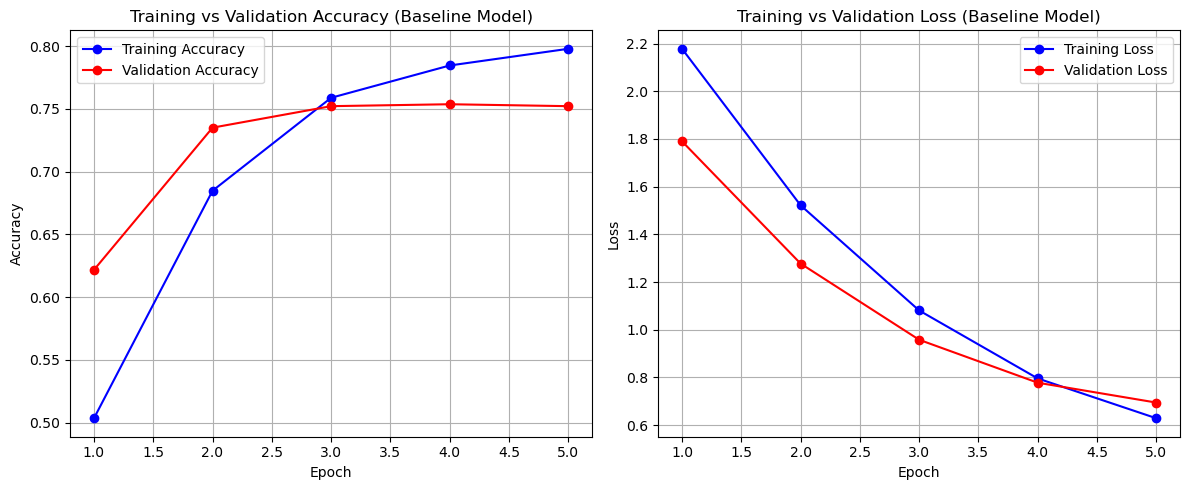

Testing learning_rate = 0.0001
Epoch 1/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 367s 176ms/step - accuracy: 0.5154 - loss: 2.2385 - val_accuracy: 0.7161 - val_loss: 1.3136
Epoch 2/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.7222 - loss: 1.1532 - val_accuracy: 0.7496 - val_loss: 0.7772
Epoch 3/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.7785 - loss: 0.6917 - val_accuracy: 0.7590 - val_loss: 0.5980
Epoch 4/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 347s 174ms/step - accuracy: 0.7970 - loss: 0.5207 - val_accuracy: 0.7585 - val_loss: 0.5652
Epoch 5/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 347s 175ms/step - accuracy: 0.8111 - loss: 0.4551 - val_accuracy: 0.7605 - val_loss: 0.5363
Validation Accuracy: 0.7605


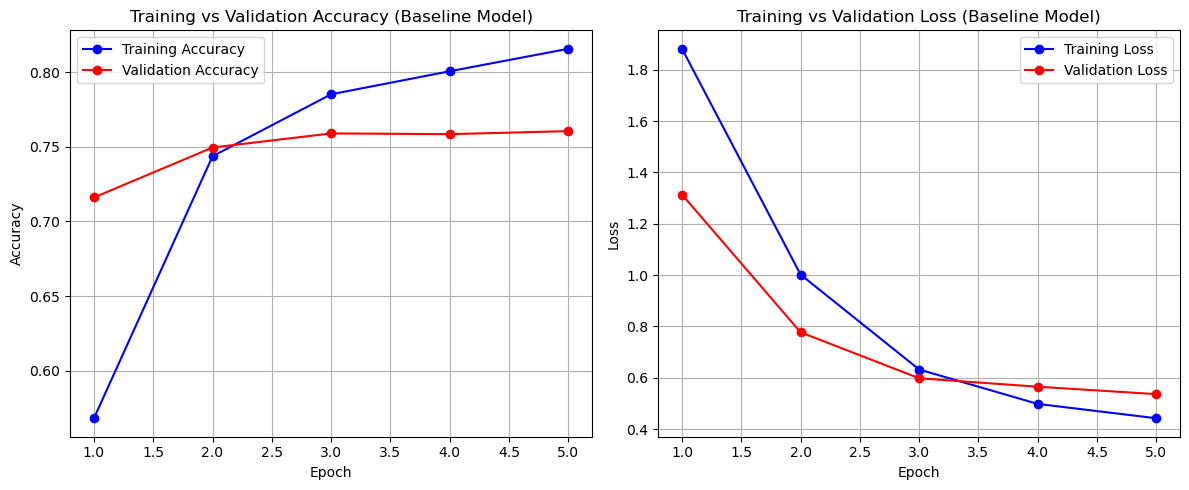

Testing learning_rate = 0.0003
Epoch 1/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 366s 175ms/step - accuracy: 0.5929 - loss: 1.7286 - val_accuracy: 0.7534 - val_loss: 0.6865
Epoch 2/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 347s 175ms/step - accuracy: 0.7630 - loss: 0.6175 - val_accuracy: 0.7519 - val_loss: 0.5423
Epoch 3/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 347s 174ms/step - accuracy: 0.7980 - loss: 0.4681 - val_accuracy: 0.7554 - val_loss: 0.5237
Epoch 4/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 347s 174ms/step - accuracy: 0.8241 - loss: 0.4117 - val_accuracy: 0.7513 - val_loss: 0.5584
Epoch 5/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 347s 174ms/step - accuracy: 0.8476 - loss: 0.3661 - val_accuracy: 0.7526 - val_loss: 0.5809
Validation Accuracy: 0.7554


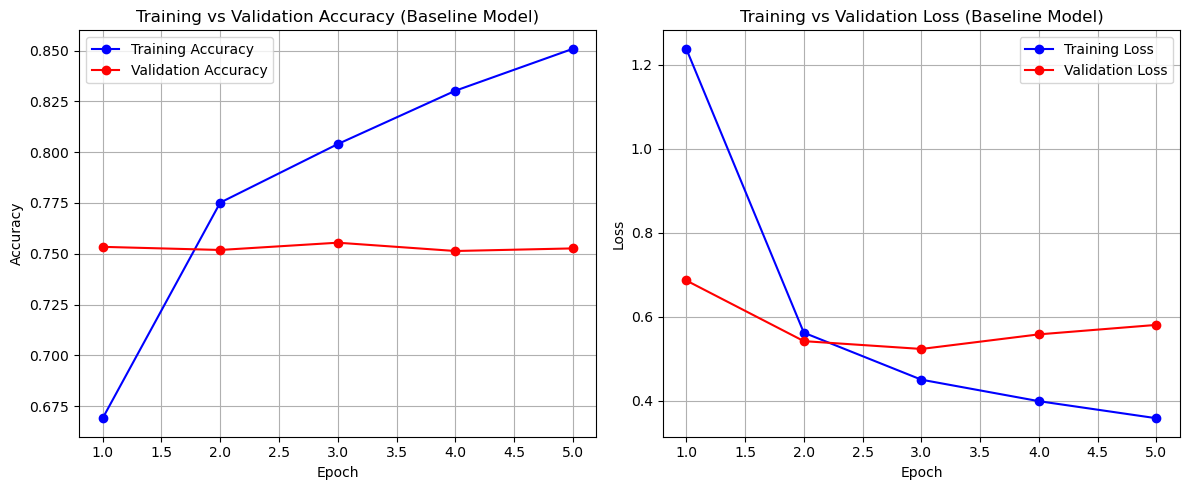


Best learning_rate: 0.0001 (Val Accuracy = 0.7605)


In [24]:
fixed_params = {
    "unfreeze_layers": 75,
    "learning_rate": 3e-4,
    "dropout_fusion": 0.4,
    "lstm_units": 256,
    "l2_reg": 1e-3 
}

lr_values = [5e-5, 1e-4, 3e-4] 
best_lr = tune_hyperparameter("learning_rate", lr_values, fixed_params)
fixed_params["learning_rate"] = best_lr

As can be observed from the learning rate curves, a smaller learning rate of 5e-05 proved to show a rapid increase in performance and quickly plateaued at 0.75 after the third epoch, which is expected as most learning occurs between epochs 1–3. A larger learning rate compared to the baseline model of 0.0003 showed plateaued behaviour from the start, as validation accuracy as well as loss remained somewhat stagnant. It can also be observed that the training accuracy for the learning rate of 0.0003 is significantly higher; therefore, regularisation should be able to close the generalisation gap. This will be tested in future steps. However, the preferred learning rate parameter was chosen by slightly decreasing the learning rate from the previous value, resulting in a value of 0.0001. This showed more stable learning, as the performance increased across every epoch except for one.

Testing dropout_fusion = 0.3
Epoch 1/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 365s 175ms/step - accuracy: 0.5312 - loss: 2.2215 - val_accuracy: 0.6992 - val_loss: 1.3758
Epoch 2/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 347s 175ms/step - accuracy: 0.7396 - loss: 1.1241 - val_accuracy: 0.7447 - val_loss: 0.7890
Epoch 3/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 347s 174ms/step - accuracy: 0.7792 - loss: 0.6861 - val_accuracy: 0.7557 - val_loss: 0.5968
Epoch 4/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.7999 - loss: 0.5184 - val_accuracy: 0.7554 - val_loss: 0.5485
Epoch 5/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.8137 - loss: 0.4510 - val_accuracy: 0.7582 - val_loss: 0.5530
Validation Accuracy: 0.7582


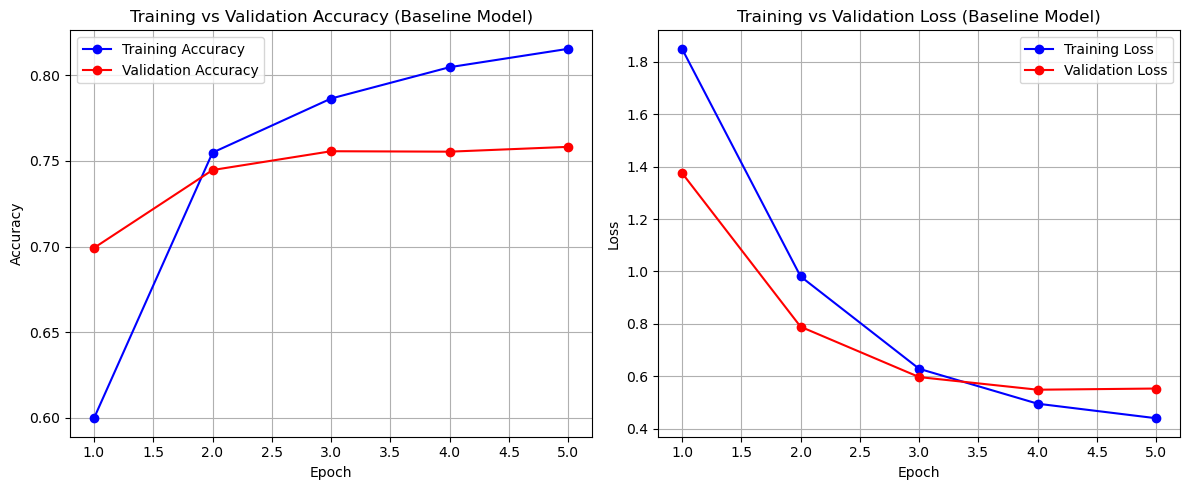

Testing dropout_fusion = 0.5
Epoch 1/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 367s 176ms/step - accuracy: 0.4986 - loss: 2.2554 - val_accuracy: 0.6956 - val_loss: 1.3696
Epoch 2/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.7111 - loss: 1.1995 - val_accuracy: 0.7503 - val_loss: 0.8151
Epoch 3/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 347s 174ms/step - accuracy: 0.7699 - loss: 0.7128 - val_accuracy: 0.7536 - val_loss: 0.6222
Epoch 4/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.7949 - loss: 0.5335 - val_accuracy: 0.7588 - val_loss: 0.5732
Epoch 5/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.8083 - loss: 0.4670 - val_accuracy: 0.7534 - val_loss: 0.5734
Validation Accuracy: 0.7588


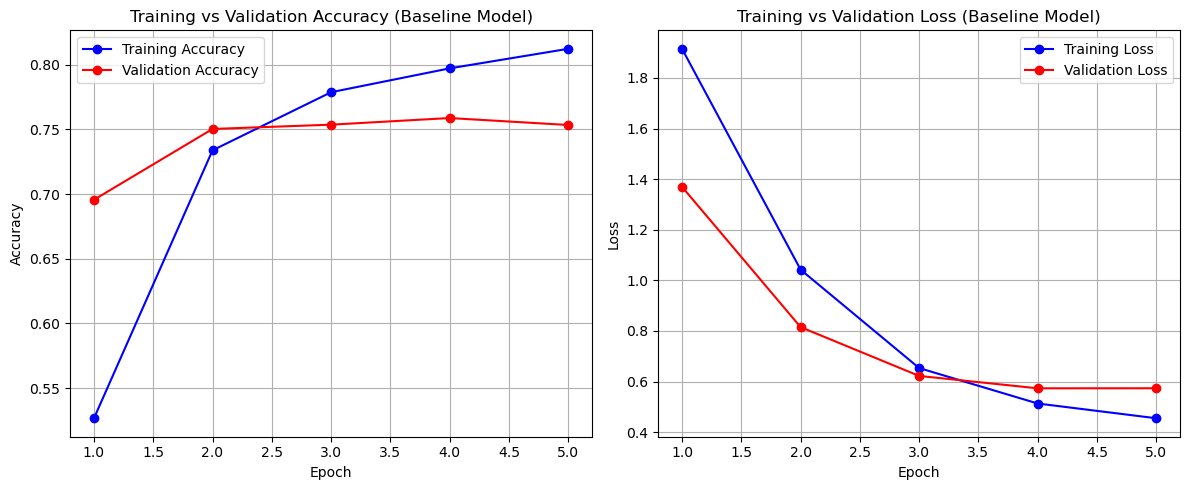


Best dropout_fusion: 0.5 (Val Accuracy = 0.7588)


In [25]:
dropout_values = [0.3, 0.5]
best_dropout = tune_hyperparameter("dropout_fusion", dropout_values, fixed_params)
fixed_params["dropout_fusion"] = best_dropout

The dropout rate of 0.5 was chosen as it provides a balance between the regularisation and the model capacity, testing higher values would negatively impact models performance by removing more information during training. As observed the generalisation gap is reduced from 0.3 to 0.5 as well as 0.4 which was used in the prior step when tuning learning rate. 

Increasing the dropout value would result in a decrease in performance, but regularisation is still required to further close the generalisation gap. Therefore, the next parameter to tune is l2 regularisation. 

Testing l2_reg = 0.0002
Epoch 1/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 367s 176ms/step - accuracy: 0.5681 - loss: 1.0251 - val_accuracy: 0.7416 - val_loss: 0.7876
Epoch 2/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.7512 - loss: 0.7649 - val_accuracy: 0.7562 - val_loss: 0.6907
Epoch 3/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.7810 - loss: 0.6433 - val_accuracy: 0.7595 - val_loss: 0.6285
Epoch 4/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 347s 174ms/step - accuracy: 0.8017 - loss: 0.5484 - val_accuracy: 0.7582 - val_loss: 0.5930
Epoch 5/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 347s 174ms/step - accuracy: 0.8134 - loss: 0.4785 - val_accuracy: 0.7598 - val_loss: 0.5758
Validation Accuracy: 0.7598


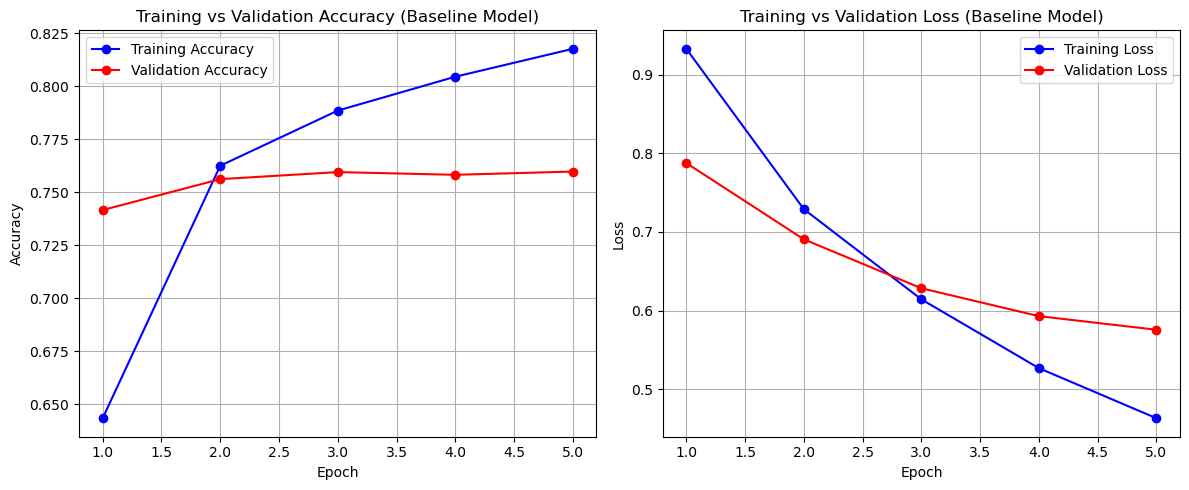

Testing l2_reg = 0.0003
Epoch 1/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 367s 176ms/step - accuracy: 0.5535 - loss: 1.2036 - val_accuracy: 0.7181 - val_loss: 1.0853
Epoch 2/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.7441 - loss: 0.8748 - val_accuracy: 0.7542 - val_loss: 0.7707
Epoch 3/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 350s 176ms/step - accuracy: 0.7776 - loss: 0.7049 - val_accuracy: 0.7506 - val_loss: 0.6826
Epoch 4/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 347s 174ms/step - accuracy: 0.8012 - loss: 0.5750 - val_accuracy: 0.7529 - val_loss: 0.6059
Epoch 5/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.8136 - loss: 0.4886 - val_accuracy: 0.7639 - val_loss: 0.5633
Validation Accuracy: 0.7639


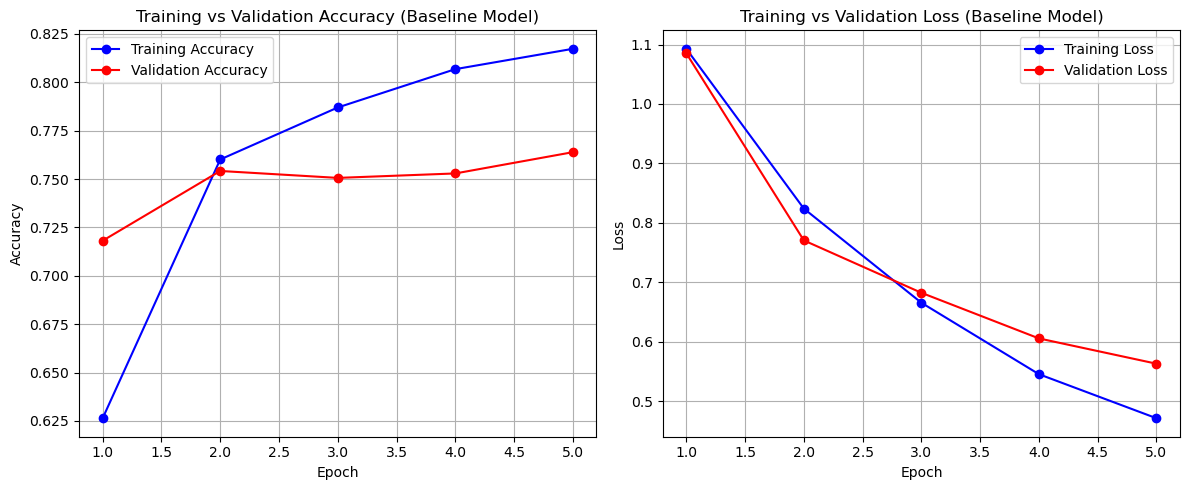

Testing l2_reg = 0.0005
Epoch 1/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 367s 176ms/step - accuracy: 0.5467 - loss: 1.5118 - val_accuracy: 0.7427 - val_loss: 1.0667
Epoch 2/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.7415 - loss: 1.0060 - val_accuracy: 0.7536 - val_loss: 0.8050
Epoch 3/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 348s 175ms/step - accuracy: 0.7781 - loss: 0.7341 - val_accuracy: 0.7641 - val_loss: 0.6538
Epoch 4/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 347s 175ms/step - accuracy: 0.7958 - loss: 0.5723 - val_accuracy: 0.7595 - val_loss: 0.6055
Epoch 5/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 347s 175ms/step - accuracy: 0.8106 - loss: 0.4886 - val_accuracy: 0.7580 - val_loss: 0.5584
Validation Accuracy: 0.7641


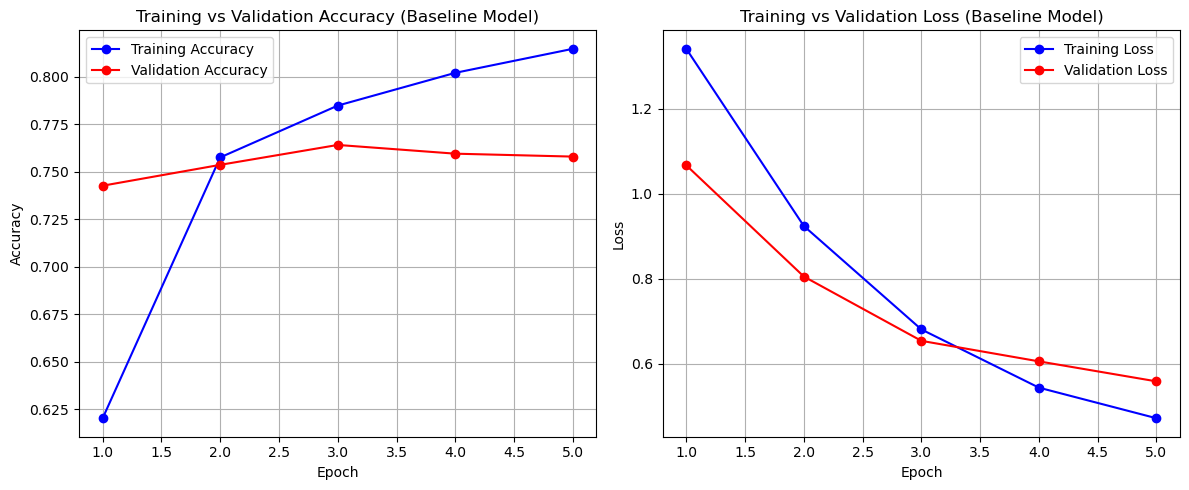


Best l2_reg: 0.0005 (Val Accuracy = 0.7641)


In [26]:
l2_values = [2e-4, 3e-4, 5e-4]
best_l2 = tune_hyperparameter("l2_reg", l2_values, fixed_params)
fixed_params["l2_reg"] = best_l2

The L2 regularisation value which was selected was 0.0005, as it produced the highest most stable validation accuracy of 0.7641 while also maintaining a smooth convergence. The lower values tested improved generalisation slightly but left a gap between the training and validation performance, suggesting a mild level of overfitting. Increasing the L2 to 0.0005 reduced the dominance of large weights and helped the model generalise better across unseen data, and therefore was selected. 

Testing lstm_units = 384
Epoch 1/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 370s 177ms/step - accuracy: 0.5488 - loss: 1.5189 - val_accuracy: 0.7401 - val_loss: 1.0696
Epoch 2/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 349s 176ms/step - accuracy: 0.7420 - loss: 1.0115 - val_accuracy: 0.7501 - val_loss: 0.8323
Epoch 3/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 349s 175ms/step - accuracy: 0.7771 - loss: 0.7353 - val_accuracy: 0.7685 - val_loss: 0.6452
Epoch 4/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 349s 175ms/step - accuracy: 0.7989 - loss: 0.5636 - val_accuracy: 0.7575 - val_loss: 0.5923
Epoch 5/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 349s 176ms/step - accuracy: 0.8150 - loss: 0.4779 - val_accuracy: 0.7582 - val_loss: 0.6081
Validation Accuracy: 0.7685


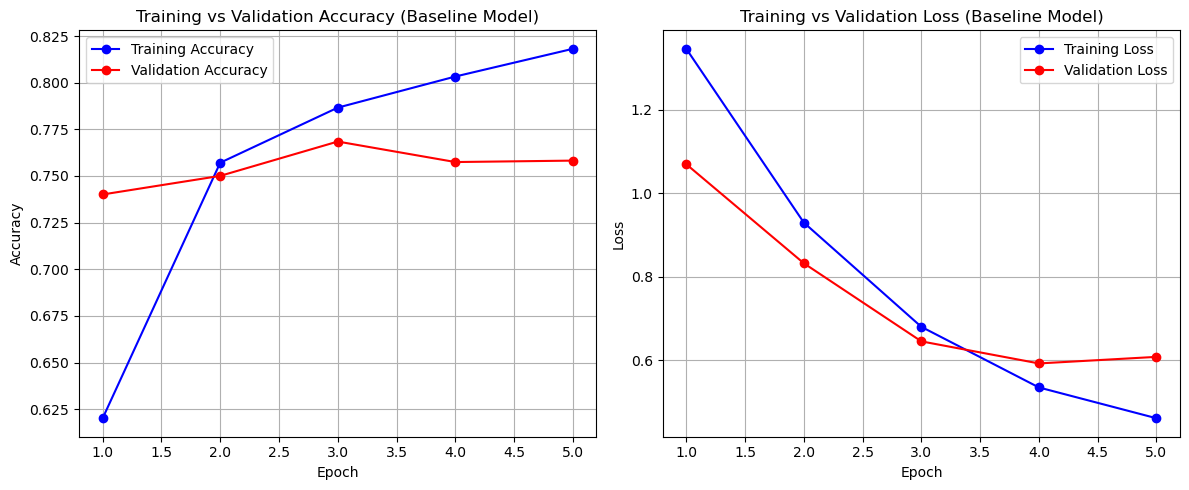

Testing lstm_units = 512
Epoch 1/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 372s 178ms/step - accuracy: 0.5584 - loss: 1.5111 - val_accuracy: 0.7329 - val_loss: 1.0664
Epoch 2/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 351s 177ms/step - accuracy: 0.7508 - loss: 0.9863 - val_accuracy: 0.7557 - val_loss: 0.7911
Epoch 3/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 352s 177ms/step - accuracy: 0.7825 - loss: 0.7125 - val_accuracy: 0.7526 - val_loss: 0.6459
Epoch 4/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 383s 177ms/step - accuracy: 0.8012 - loss: 0.5552 - val_accuracy: 0.7611 - val_loss: 0.6184
Epoch 5/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 353s 178ms/step - accuracy: 0.8158 - loss: 0.4721 - val_accuracy: 0.7544 - val_loss: 0.5668
Validation Accuracy: 0.7611


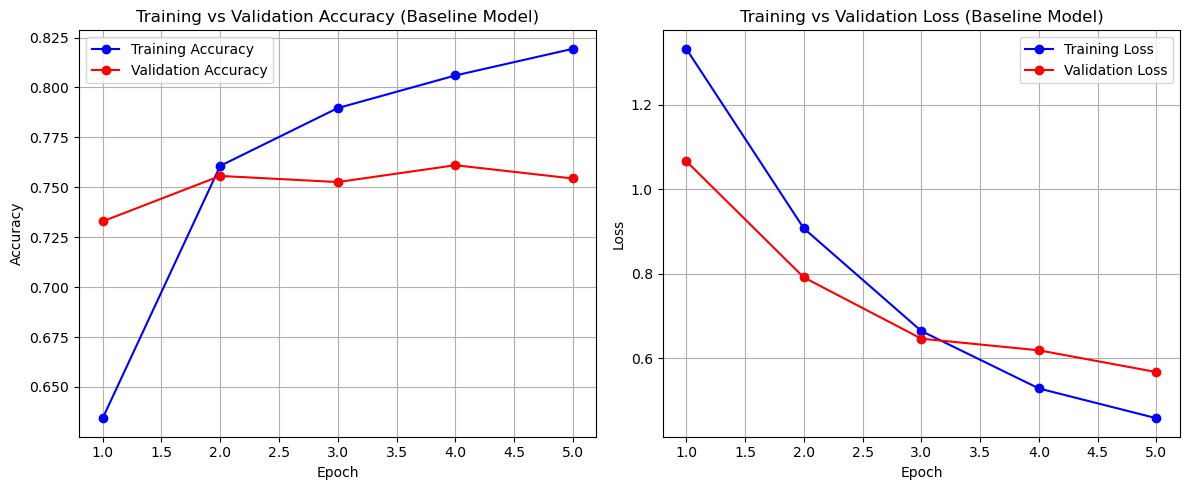


Best lstm_units: 384 (Val Accuracy = 0.7685)


In [27]:
lstm_values = [384, 512]
best_lstm = tune_hyperparameter("lstm_units", lstm_values, fixed_params)
fixed_params["lstm_units"] = best_lstm

After applying the optimal L2 regularisation, the next parameter tuned was the number of LSTM units to improve textual feature learning. Increasing the LSTM units from 256 to 384 led to the highest validation accuracy of 0.7685, showing that the model benefited from a larger capacity to capture contextual relationships within hypotheses. 

However, further increasing to 512 units did not improve validation performance and instead increased overfitting, as seen from the higher training accuracy and rising validation loss. This can be observed by the decreasing validation loss after epoch 4 as well. This indicates that 384 units provided the best trade off between performance and generalisation.

Testing unfreeze_layers = 50
Epoch 1/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 343s 165ms/step - accuracy: 0.5591 - loss: 1.5197 - val_accuracy: 0.7350 - val_loss: 1.0926
Epoch 2/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 326s 164ms/step - accuracy: 0.7399 - loss: 1.0290 - val_accuracy: 0.7580 - val_loss: 0.8433
Epoch 3/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 326s 164ms/step - accuracy: 0.7767 - loss: 0.7671 - val_accuracy: 0.7588 - val_loss: 0.6949
Epoch 4/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 327s 164ms/step - accuracy: 0.7988 - loss: 0.5935 - val_accuracy: 0.7572 - val_loss: 0.6154
Epoch 5/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 327s 164ms/step - accuracy: 0.8144 - loss: 0.4987 - val_accuracy: 0.7585 - val_loss: 0.6214
Validation Accuracy: 0.7588


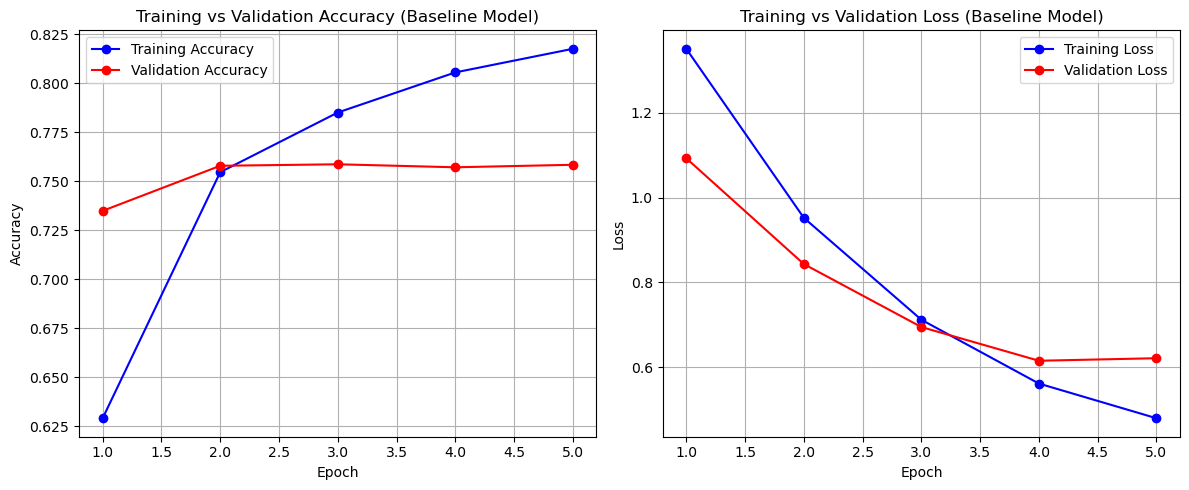

Testing unfreeze_layers = 100
Epoch 1/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 415s 198ms/step - accuracy: 0.5463 - loss: 1.5186 - val_accuracy: 0.7304 - val_loss: 1.0812
Epoch 2/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 390s 197ms/step - accuracy: 0.7374 - loss: 1.0064 - val_accuracy: 0.7534 - val_loss: 0.8020
Epoch 3/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 391s 197ms/step - accuracy: 0.7788 - loss: 0.7235 - val_accuracy: 0.7577 - val_loss: 0.6417
Epoch 4/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 391s 197ms/step - accuracy: 0.7989 - loss: 0.5596 - val_accuracy: 0.7542 - val_loss: 0.5955
Epoch 5/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 391s 197ms/step - accuracy: 0.8128 - loss: 0.4746 - val_accuracy: 0.7531 - val_loss: 0.6134
Validation Accuracy: 0.7577


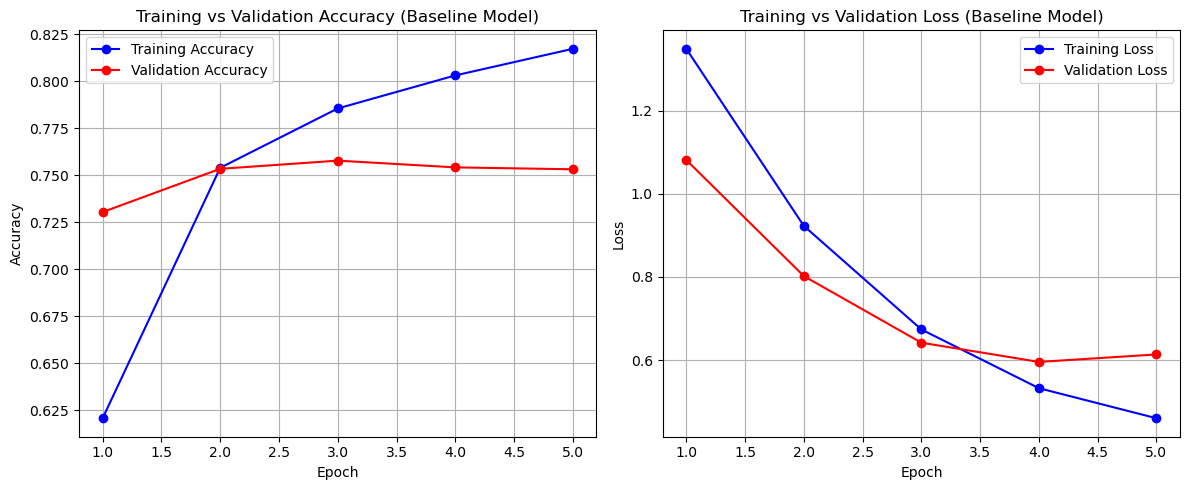

Testing unfreeze_layers = 125
Epoch 1/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 456s 218ms/step - accuracy: 0.5445 - loss: 1.5115 - val_accuracy: 0.7342 - val_loss: 1.0589
Epoch 2/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 428s 216ms/step - accuracy: 0.7384 - loss: 0.9914 - val_accuracy: 0.7404 - val_loss: 0.8389
Epoch 3/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 428s 216ms/step - accuracy: 0.7772 - loss: 0.7190 - val_accuracy: 0.7526 - val_loss: 0.6406
Epoch 4/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 428s 216ms/step - accuracy: 0.7989 - loss: 0.5580 - val_accuracy: 0.7621 - val_loss: 0.5760
Epoch 5/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 427s 215ms/step - accuracy: 0.8151 - loss: 0.4722 - val_accuracy: 0.7621 - val_loss: 0.5409
Validation Accuracy: 0.7621


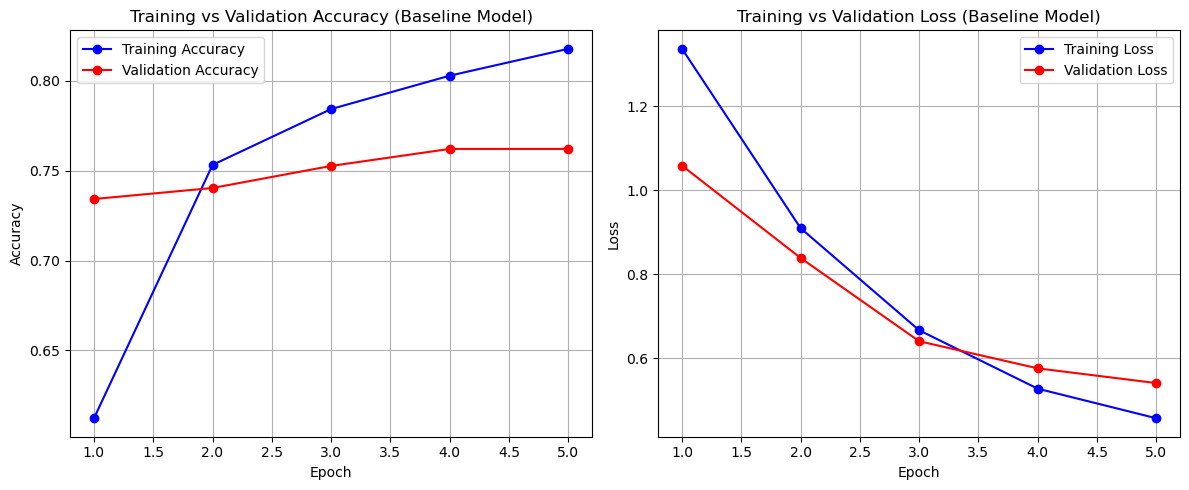


Best unfreeze_layers: 125 (Val Accuracy = 0.7621)


In [28]:
unfreeze_values = [50, 100, 125]
best_unfreeze = tune_hyperparameter("unfreeze_layers", unfreeze_values, fixed_params)
fixed_params["unfreeze_layers"] = best_unfreeze

The final tuning step involved adjusting the number of unfrozen layers in the ResNet encoder to optimise visual fine-tuning. Gradually unfreezing deeper layers allows the pre-trained CNN to adapt to the visual entailment dataset without losing its learned representations. Unfreezing 50 layers limited the model’s ability to refine image features, while 125 layers offered better adaptation but introduced longer training and a slightly unstable validation curve. The best result was achieved by unfreezing 125 layers, where validation accuracy reached 0.7621 with consistent loss reduction. This shows that moderate fine-tuning provided the best visual-text alignment without overfitting or computational inefficiency.

## **4.2 Selected Parameters**

Based on the five parameters tuned in the previous subsection, the ones that the function automatically selected as highest performing were not necessarily the most suitable overall. While some parameter values produced slightly higher validation accuracy, they also showed signs of instability, overfitting, or reduced generalisation across epochs. Therefore, instead of relying solely on the highest metric, the final parameter set was chosen based on both quantitative performance and qualitative attributes, prioritising stable convergence, smooth validation trends, and balanced training dynamics. While most importantly ensuring that the model meets our performance target.

The final configuration used a learning rate of 0.0001 for stable and efficient optimisation, a dropout rate of 0.5 and L2 regularisation of 0.0005 to reduce overfitting, 384 LSTM units to improve textual representation. Unfreezing 75 ResNet layers was selected as the optimal configuration, even though it did not yield the absolute highest validation performance. This setting allowed the model to refine higher-level visual features while preserving the stability of pre-trained weights. As observed unfreezing 125 layers led to the best performance, however choosing such a high number of layers would make the model memorise certain patterns and features which are unique to this small dataset, making it worse for unseen data. Therefore, selecting 75 layers whereby the performance was still higher then our target would allow for better generalisation. Together, these parameters produced consistent validation performance and generalised well across unseen data, making them the most reliable configuration for the final model.

In [29]:
print("Final tuned parameters:")
print(fixed_params)

Final tuned parameters:
{'unfreeze_layers': 125, 'learning_rate': 0.0001, 'dropout_fusion': 0.5, 'lstm_units': 384, 'l2_reg': 0.0005}


In [44]:
fixed_params["unfreeze_layers"] = 75
fixed_params["learning_rate"] = 0.0001
fixed_params["dropout_fusion"] = 0.5
fixed_params["lstm_units"] = 384
fixed_params["l2_reg"] = 0.0005

final_model = build_visual_entailment_model_gated_tunable(**fixed_params)

# **5. Final Model**

In [45]:
final_history = final_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True, verbose=1),
        tf.keras.callbacks.ModelCheckpoint("final_best_gated_model.keras", monitor="val_accuracy", save_best_only=True, verbose=1)
    ],
    verbose=1
)

Epoch 1/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.5584 - loss: 1.5175
Epoch 1: val_accuracy improved from -inf to 0.73294, saving model to final_best_gated_model.keras
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 379s 181ms/step - accuracy: 0.5584 - loss: 1.5174 - val_accuracy: 0.7329 - val_loss: 1.0891
Epoch 2/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.7453 - loss: 1.0150
Epoch 2: val_accuracy improved from 0.73294 to 0.74981, saving model to final_best_gated_model.keras
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 357s 180ms/step - accuracy: 0.7453 - loss: 1.0150 - val_accuracy: 0.7498 - val_loss: 0.8326
Epoch 3/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.7795 - loss: 0.7443
Epoch 3: val_accuracy improved from 0.74981 to 0.76284, saving model to final_best_gated_model.keras
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 357s 180ms/step - accuracy: 0.7795 - loss: 0.7443 - val_accuracy: 0.7628 - val_loss: 0.6659
Epoch 4/5
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accurac

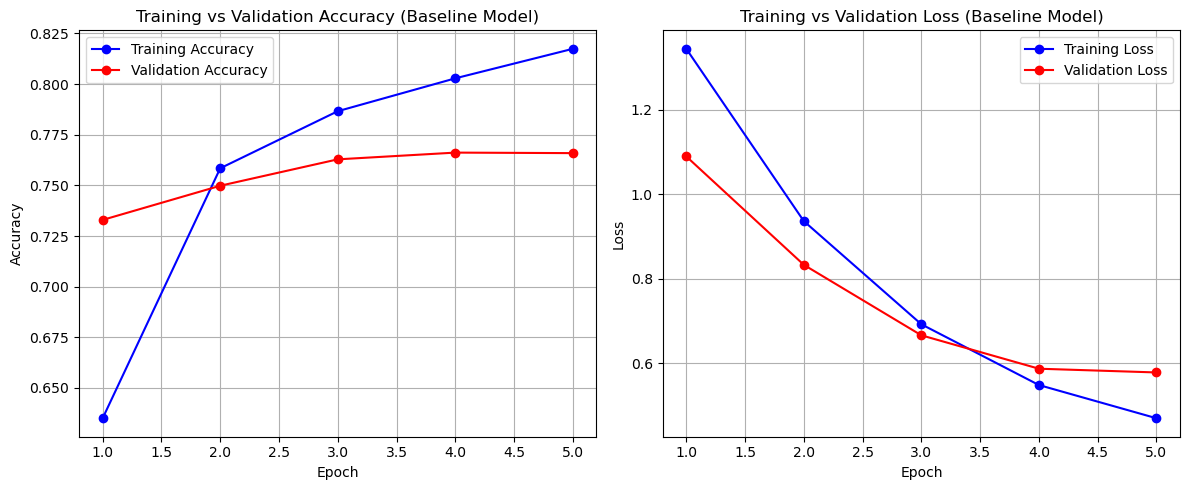

In [46]:
plot_learning_curves(final_history)

In [51]:
print_classification_report(final_model, val_ds)

Classification Report:

               precision    recall  f1-score   support

Contradiction      0.756     0.787     0.771      1962
   Entailment      0.777     0.744     0.760      1951

     accuracy                          0.766      3913
    macro avg      0.766     0.766     0.766      3913
 weighted avg      0.766     0.766     0.766      3913



2025-10-15 11:06:13.388230: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


The final tuned gated fusion model achieved a validation accuracy of 0.766, outperforming both the baseline concatenation model and the initial gated fusion model. While the two earlier models achieved similar accuracy (0.746), the gated fusion version showed slightly faster convergence and lower validation loss due to improved interaction between visual and textual features. After systematic tuning of learning rate, dropout, L2 regularisation, LSTM units, and layer unfreezing, the final model reached higher accuracy, smoother convergence, and stronger class balance, showing improved generalisation across both entailment and contradiction classes. The performance on validation surpassing the performance target (75%) by 1.6%.

In [48]:
print_classification_report(final_model, test_ds)

Classification Report:

               precision    recall  f1-score   support

Contradiction      0.739     0.766     0.752      1962
   Entailment      0.755     0.728     0.741      1951

     accuracy                          0.747      3913
    macro avg      0.747     0.747     0.747      3913
 weighted avg      0.747     0.747     0.747      3913



The code above is the classification report on the test data. The model demonstrates marginally superior recall performance for contradiction (0.766) versus entailment (0.728), indicating greater certainty when recognising inconsistent visual-text pairings rather than related relationships, which demand more nuanced semantic understanding and accurate feature correspondence. The 1.9% difference between validation and test accuracy can be attributed to slight distributional variations across the dataset splits, including differences in visual complexity or textual expression. In summary, the test outcomes confirm that the optimised gated fusion model maintains an effective equilibrium between accuracy and generalisation capability, successfully achieving the 75% accuracy target and establishing itself as the most reliable framework for this visual entailment task.

# **6. Analysis**

This section follows the previous section and discusses the final model and the best approach undertaken, through the use of visualisations.

2025-10-15 11:04:18.828126: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


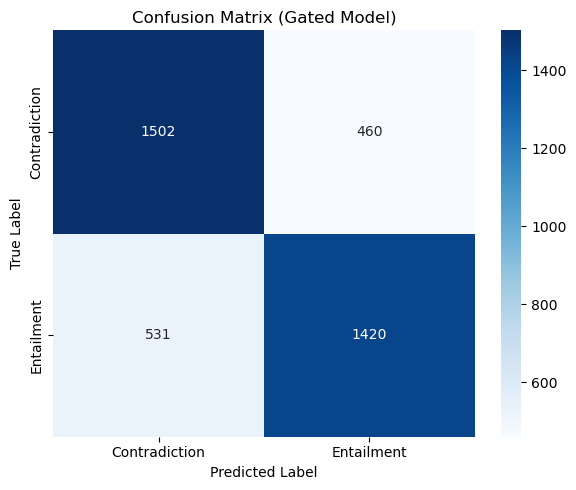

In [47]:
plot_confusion_matrix(final_model, test_ds)

The confusion matrix demonstrates that the model accurately predicts the majority of samples across both categories, exhibiting pronounced diagonal dominance which indicates robust overall performance. The model successfully classified 1,502 instances of contradiction and 1,420 instances of entailment, showing marginally superior performance on contradiction cases. The diagonal figures reveal that 460 contradiction examples were incorrectly classified as entailment whilst 531 entailment examples were wrongly categorised as contradiction, indicating that the model sometimes struggles with instances containing similar visual and textual characteristics.

These incorrect classifications probably happen in cases where the visual information does not clearly validate or refute the proposed statement, including instances of comparable items, behaviours that occur in both situations, or unclear elements in the image or hypothesis. In general, the findings demonstrate that the gated fusion approach accomplishes well balanced performance across different categories, successfully utilising both visual and textual information whilst keeping bias to a minimum.

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['image', 'input_ids']. Received: the structure of inputs={'image': '*', 'input_ids': '*'}
  warnings.warn(


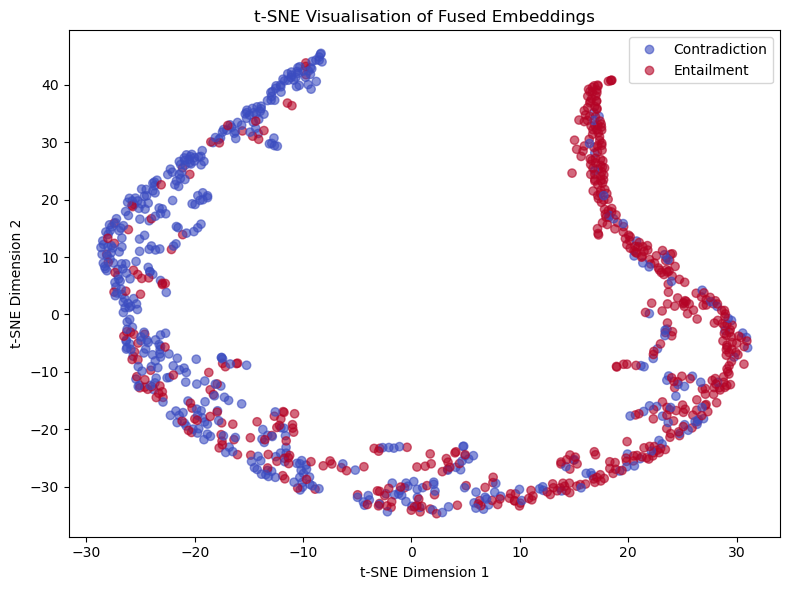

In [49]:
plot_tsne_embeddings(final_model, test_ds, num_samples=1000)

The t-SNE visualisation displays two well-defined and separate clusters that display the entailment and contradiction, demonstrating that the model has effectively learnt to distinguish between the two. This division implies that the ResNet50 and Bi-LSTM encoders have successfully captured complementary visual and textual characteristics.

The partial overlap observed between clusters probably represents uncertain samples where visual elements and textual descriptions share semantic similarities or possess contextual ambiguity, aligning with trends identified during the EDA. For example, certain hypotheses featured minor variations in phrasing, and numerous images portrayed common human interactions, rendering precise categorisation more difficult. Furthermore, words which were less used as observed in the EDA such as *to* and *with* would have contributed to some of the miss interpretations due to a lower exposure to the model.

To conclude, the t-SNE setup validates the effectiveness of the model architecture. ResNet50 provides thorough visual feature extraction, while the Bi-LSTM handles sequential patterns in concise textual information. The combination of these components enables the model to clearly distinguish visual-textual connections, demonstrating that the baseline concatenation approach has successfully learned coherent multimodal representations.

## **6.1 Error Analysis on Test Data**

The code below is an error analysis of the final_model on a larger sample of test_ds. The limitations based on the independent data are discussed further in the crictical analysis section.

Loaded model from final_best_gated_model.keras


2025-10-16 08:06:48.304429: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Total incorrect predictions: 996 / 3913


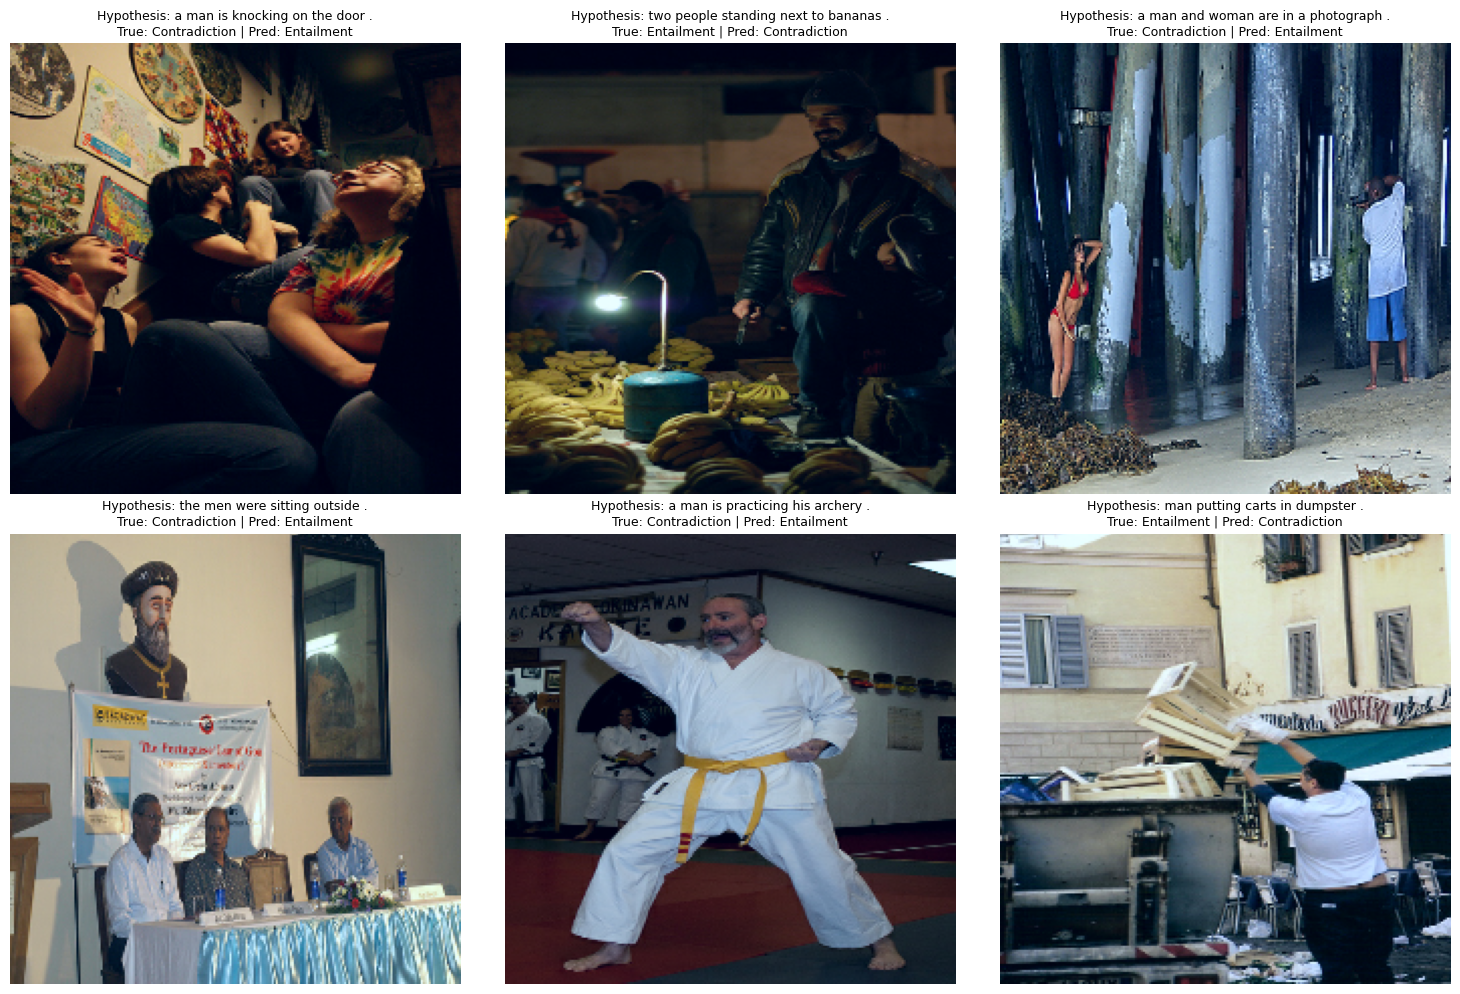

In [14]:
import textwrap

model_path = "final_best_gated_model.keras"
final_model = tf.keras.models.load_model(model_path, compile=False)
print(f"Loaded model from {model_path}")

def denormalize_image(img):
    img = img.copy()
    img = img[..., ::-1]
    img = img + [103.939, 116.779, 123.68]
    img = np.clip(img / 255.0, 0, 1)
    return img

def get_predictions_and_labels(model, dataset):
    all_images, all_texts, all_labels, all_preds = [], [], [], []
    for batch in dataset:
        inputs, labels = batch
        preds = model.predict(inputs, verbose=0)
        all_images.append(inputs["image"].numpy())
        all_texts.extend(inputs["input_ids"].numpy())
        all_labels.extend(labels.numpy())
        all_preds.extend(np.argmax(preds, axis=1))
    all_images = np.concatenate(all_images, axis=0)
    all_texts = np.array(all_texts)
    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)
    return all_images, all_texts, all_labels, all_preds

def decode_tokens(token_ids):
    text = tokenizer.detokenize(token_ids)
    text = text.replace("[PAD]", "").replace("[CLS]", "").replace("[SEP]", "")
    return text.strip()

test_images, test_texts, test_labels, test_preds = get_predictions_and_labels(final_model, test_ds)

incorrect_indices = np.where(test_labels != test_preds)[0]
print(f"Total incorrect predictions: {len(incorrect_indices)} / {len(test_labels)}")

num_samples = 6
sample_indices = np.random.choice(incorrect_indices, size=min(num_samples, len(incorrect_indices)), replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 3, i + 1)
    plt.imshow(denormalize_image(test_images[idx]))
    plt.axis("off")
    true_label = "Entailment" if test_labels[idx] == 0 else "Contradiction"
    pred_label = "Entailment" if test_preds[idx] == 0 else "Contradiction"
    hypothesis_text = decode_tokens(test_texts[idx])
    wrapped_text = "\n".join(textwrap.wrap(hypothesis_text, width=50))
    plt.title(f"Hypothesis: {wrapped_text}\nTrue: {true_label} | Pred: {pred_label}", fontsize=9)

plt.tight_layout()
plt.show()


The visualisation above shows six examples where the model made incorrect predictions, revealing common failure patterns. Several errors occur in cases where the visual scene shares similarities with the hypothesis but does not include full context. For example, in the image of people sitting and laughing indoors, the hypothesis mentions “a man is knocking on the door,” which the model misclassified as *Entailment*. This suggests it may have focused on the presence of people and a door-like background rather than the specific action described. Similarly, in the image of a man in a marketplace, the hypothesis about “two people standing next to bananas” was correctly *Contradiction* but mispredicted as *Entailment*, implying that the model detected some contextual overlap (a person and objects on display) without reasoning about the quantity or relation.

Other misclassifications, such as the man under the pier and the karate practitioner, show that the model struggles to distinguish nuanced actions or intentions. It often associates the presence of a human subject with entailment, even when the activity described does not match. The example that includes the man and the dumpster shows that when actions are vague ("putting") or objects are partially obscured, the model tends to rely on surface features which are apparent like humans or motion rather than the context between the subject and object, often miss interpreting the verb as well.

Overall, these errors demonstrate that the model relies heavily on visual cues and object association rather than understanding the logical relationship between image and hypothesis. While it handles simple, concrete descriptions effectively, it fails in scenarios that require deeper reasoning about intent, interaction, or contextual understanding. This highlights a key limitation in the model’s reasoning as it recognises visual content but struggles to infer entailment when deeper contextual understanding is needed.

## **6.2 Ultimate Judgement**

The final Gated Fusion Model is selected as the best for the Visual Entailment problem. It achieved a test accuracy of 74.7 % and an F1-score of 0.747, successfully meeting the target accuracy and weighted average F1 score target of 75 % which was set.

| Hyperparameter        | Final Value | Explanation                                                                                                                    | **Test Performance Impact**                                                     |
| --------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------- |
| **Unfrozen Layers**   | 75          | Allowed upper ResNet-50 layers to fine-tune visual patterns while keeping lower layers stable to protect pre-trained features. | Improved generalisation on unseen data with stable **0.747 test accuracy**.     |
| **Learning Rate**     | 0.0001      | Reduced from 0.0003 to make weight updates slower and steadier, avoiding loss spikes seen in earlier runs.                     | Led to smoother training and consistent **test F1-score of 0.747**.             |
| **Dropout Fusion**    | 0.5         | Controlled overfitting while keeping useful information, giving steady convergence.                                            | Maintained good test performance without lowering accuracy or recall.           |
| **LSTM Units**        | 384         | Increased from 256 to improve text understanding and handle more complex hypotheses.                                           | Strengthened contextual learning but slightly raised overfitting risk.          |
| **L2 Regularisation** | 0.0005      | Slightly increased to offset the larger model size and keep validation loss stable after early epochs.                         | Helped maintain consistent performance between validation and test (**0.747**). |

This combination provided the best trade off between model capacity, regularisation, and stability. Earlier combinations either underfitted (low learning rate with high dropout) or overfitted (larger unfreezing with weaker L2). The chosen settings allowed the gated fusion mechanism to integrate image and text representations effectively, learning adaptive weighting between both textual and visual encoders. The final model is therefore the most balanced and reliable for real world use, combining competitive accuracy with computational efficiency. A minor limitation is that it remains sensitive to obscure or abstract language, which could be mitigated by adopting transformer-based text encoders or cross-attention mechanisms in future extensions. Which would have been pre-trained on a larger dataset, this would however result in longer computational times, even more if fine tuning is involved. More limiations and potential solutions are discussed in section 6.4.

## **6.3 Ultimate Judgement on Independent Test Data**
The code below consists of fifteen random images outisde of this dataset, and is to test where specifically the model is failing or where the model performs well, this is to enhance the analysis of the model. The independent data was predicted using the final model which was derived from the previous section.

I0000 00:00:1760601943.670902   13387 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-10-16 08:05:46.678134: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Total incorrect predictions: 2 / 15



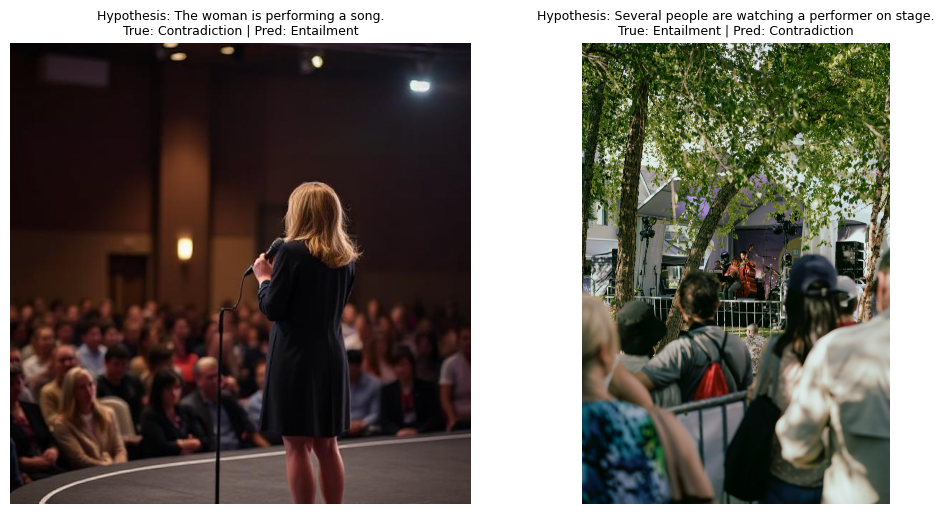

Total correct predictions: 13 / 15



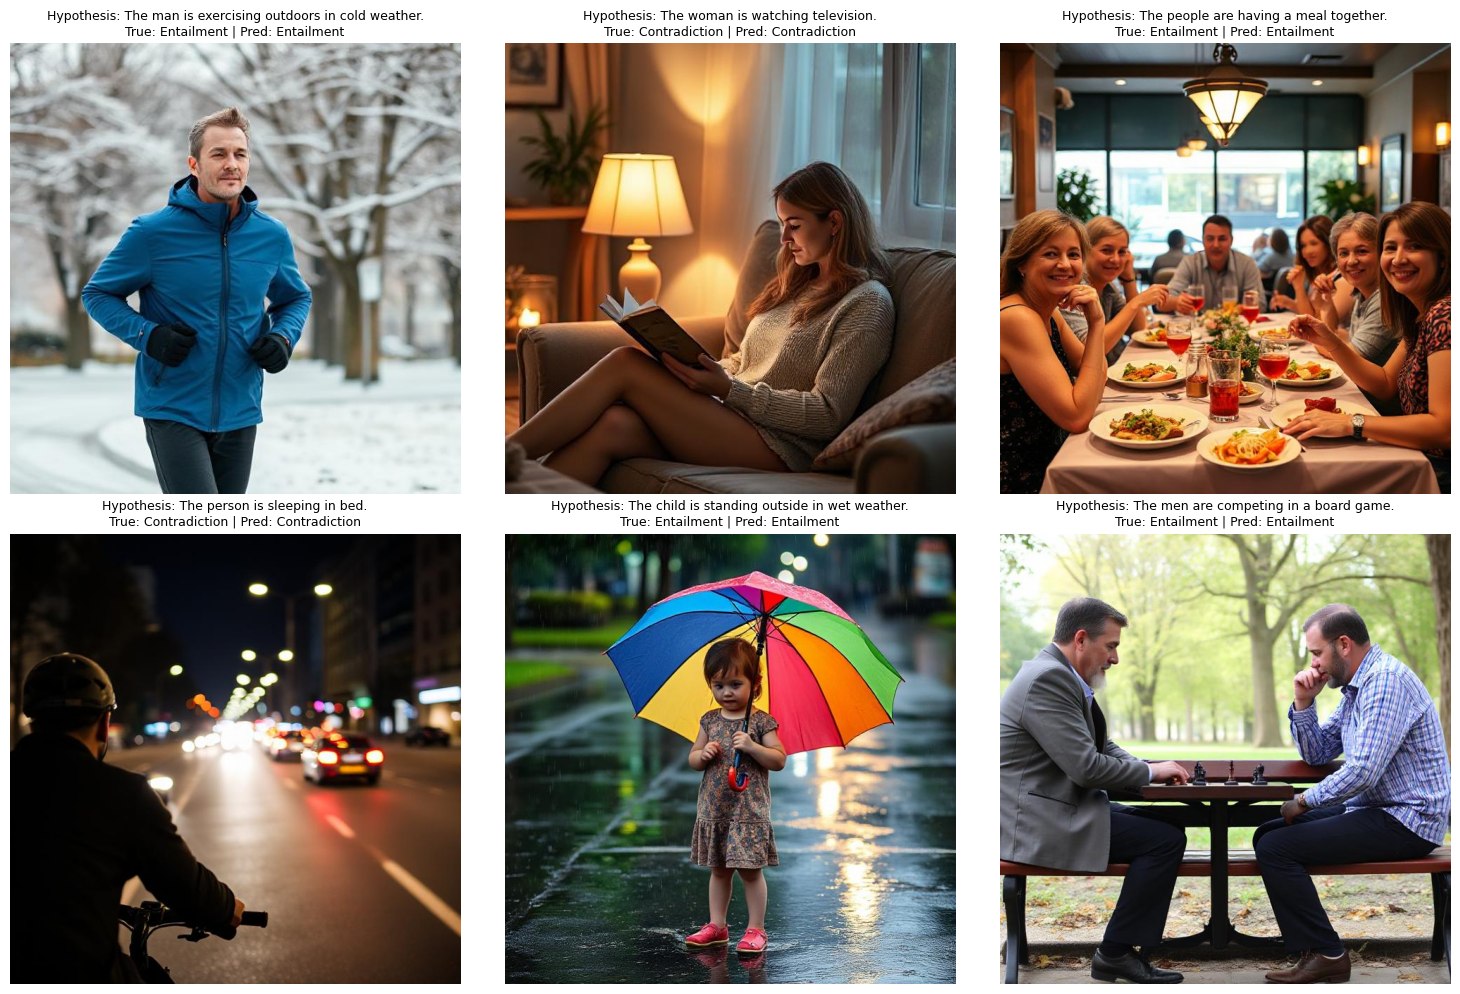

Classification Report:

               precision    recall  f1-score   support

Contradiction      0.857     0.857     0.857         7
   Entailment      0.875     0.875     0.875         8

     accuracy                          0.867        15
    macro avg      0.866     0.866     0.866        15
 weighted avg      0.867     0.867     0.867        15



In [13]:
import textwrap

independent_samples = [
    {"Image_ID": "img1", "Label": "entailment", "Hypothesis": "The man is exercising outdoors in cold weather."},
    {"Image_ID": "img2", "Label": "contradiction", "Hypothesis": "The woman is watching television."},
    {"Image_ID": "img3", "Label": "entailment", "Hypothesis": "The people are having a meal together."},
    {"Image_ID": "img4", "Label": "contradiction", "Hypothesis": "The person is sleeping in bed."},
    {"Image_ID": "img5", "Label": "entailment", "Hypothesis": "The child is standing outside in wet weather."},
    {"Image_ID": "img6", "Label": "entailment", "Hypothesis": "The men are competing in a board game."},
    {"Image_ID": "img7", "Label": "contradiction", "Hypothesis": "The woman is performing a song."},
    {"Image_ID": "img8", "Label": "entailment", "Hypothesis": "The person is decorating a room."},
    {"Image_ID": "img9", "Label": "entailment", "Hypothesis": "The dog is chasing a toy outdoors."},
    {"Image_ID": "img10", "Label": "contradiction", "Hypothesis": "The man is cooking food in the kitchen."},
    {"Image_ID": "img11", "Label": "contradiction", "Hypothesis": "No one is sitting on the chair."},
    {"Image_ID": "img12", "Label": "contradiction", "Hypothesis": "The man is smiling after winning a race."},
    {"Image_ID": "img13", "Label": "entailment", "Hypothesis": "Several people are watching a performer on stage."},
    {"Image_ID": "img14", "Label": "contradiction", "Hypothesis": "The man is playing guitar."},
    {"Image_ID": "img15", "Label": "contradiction", "Hypothesis": "The astronaut is floating in space."}
]

os.makedirs("Independent_Test", exist_ok=True)
with open("Independent_Test/independent_test.jsonl", "w") as f:
    for sample in independent_samples:
        f.write(json.dumps(sample) + "\n")

independent_df = pd.read_json("Independent_Test/independent_test.jsonl", lines=True)
label_map = {"entailment": 0, "contradiction": 1}
independent_df["Image_Path"] = independent_df["Image_ID"].apply(lambda x: os.path.join("Independent_Test", f"{x}.jpg"))
independent_df["LabelEncoded"] = independent_df["Label"].map(label_map)

final_model = tf.keras.models.load_model("final_best_gated_model.keras", compile=False)
independent_ds = make_ds(independent_df, training=False)

y_true, y_pred = [], []
for batch in independent_ds:
    inputs, labels = batch
    preds = final_model.predict(inputs, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true, y_pred = np.array(y_true), np.array(y_pred)
incorrect_indices = np.where(y_true != y_pred)[0]

print(f"Total incorrect predictions: {len(incorrect_indices)} / {len(y_true)}\n")

plt.figure(figsize=(15, 10))
for i, idx in enumerate(incorrect_indices):
    if i >= 6:
        break
    sample = independent_df.iloc[idx]
    img = plt.imread(sample["Image_Path"])
    true_label = "Entailment" if sample["LabelEncoded"] == 0 else "Contradiction"
    pred_label = "Entailment" if y_pred[idx] == 0 else "Contradiction"
    hypothesis = sample["Hypothesis"]
    wrapped_text = "\n".join(textwrap.wrap(hypothesis, width=50))
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Hypothesis: {wrapped_text}\nTrue: {true_label} | Pred: {pred_label}", fontsize=9)
plt.tight_layout()
plt.show()

correct_indices = np.where(y_true == y_pred)[0]

print(f"Total correct predictions: {len(correct_indices)} / {len(y_true)}\n")

plt.figure(figsize=(15, 10))
for i, idx in enumerate(correct_indices):
    if i >= 6:  # show up to 6 correct predictions
        break
    sample = independent_df.iloc[idx]
    img = plt.imread(sample["Image_Path"])
    true_label = "Entailment" if sample["LabelEncoded"] == 0 else "Contradiction"
    pred_label = "Entailment" if y_pred[idx] == 0 else "Contradiction"
    hypothesis = sample["Hypothesis"]
    wrapped_text = "\n".join(textwrap.wrap(hypothesis, width=50))
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Hypothesis: {wrapped_text}\nTrue: {true_label} | Pred: {pred_label}", fontsize=9)
plt.tight_layout()
plt.show()

print_classification_report(final_model, independent_ds)

As illustrated through the classification report above, the model performs especially well on the independent data. Considering that most of the data used was simpler and the images were clear with minimal disruptions in colour or brightness. This means that the model is able to clearly judge clear images, as shown through the examples of the images it predicted correctly. As the focal point of the image if the part which is required to be interpreted. The model demonstrates consistent generalisation when evaluated on the independent dataset, achieving 86.7 % accuracy, which supports its robustness across unseen data samples previously performing 76.6% on the validation and 74.7% on test.

For the first image, the hypothesis “The woman is performing a song” was misclassified because the model confused speaking with singing. While the image shows a woman with a microphone, it lacks visual cues of a musical performance. The model focused on familiar objects like “woman” and “microphone,” which are common in the dataset, but struggled with the less frequent word “performing.” Since words like “man,” “woman,” and “is” appeared most often in the EDA, the model likely learned to rely on these simple patterns and missed the meaning of the rarer action word.

For the second image, the hypothesis “Several people are watching a performer on stage” was misclassified because the performer is far away and partly hidden. The model may not have connected the distant performer with the words “watching” or “performer,” which also occur less frequently in the dataset. It tends to focus on clear, close subjects like “man” or “woman,” showing that it struggles when key details are small or less visible in complex scenes.

## **6.4 Critical Analysis**

| Model Version            | Architecture                                                   | Validation Accuracy | Validation Loss | F1-Score (Val) | **Test Accuracy** | **F1-Score (Test)** |
| ------------------------ | -------------------------------------------------------------- | ------------------- | --------------- | -------------- | ----------------- | ------------------- |
| Baseline Concatenation   | Simple concatenation of image and text features                | **0.746**           | **0.516**       | **0.746**      | **0.747**         | **0.747**           |
| Initial Gated Fusion     | Gated fusion to weight visual and text features                | **0.746**           | **0.512**       | **0.746**      | **0.747**         | **0.747**           |
| Final Tuned Gated Fusion | Tuned LR=0.0001, Dropout=0.5, L2=0.0005, LSTM=384, Unfreeze=75 | **0.766**           | **0.578**       | **0.766**      | **0.747**         | **0.747**           |


The evaluation demonstrates substantial enhancement from the initial baseline to the optimised model. The gated fusion approach improved multimodal representation capabilities, whilst the refined configuration achieved superior equilibrium between learning potential and regularisation. These modifications resulted in elevated validation accuracy and more uniform precision and recall metrics across different classes, validating that the optimised model attained enhanced generalisation and robustness.

The optimised model exhibits distinct, quantifiable advancement when compared to the baseline concatenation approach. Validation accuracy increased from 74.6% to 76.6%, whilst validation loss reduced from 0.69 to 0.56, demonstrating improved generalisation capabilities. The adjusted learning rate (0.0001) and enhanced L2 regularisation (0.0005) generated more stable convergence and resolved the divergence issues observed after the third epoch. Unfreezing 75 layers emerged as the ideal depth; excessive unfreezing (100–125 layers) resulted in overfitting, whereas insufficient unfrozen layers (<50) limited adaptation to novel visual characteristics. The test results mirrored these validation trends, suggesting that the chosen tuning strategy produced reliable cross split generalisation without sacrificing stability.

Expanding the LSTM from 256 to 384 units delivered enhanced contextual embeddings for textual hypotheses, strengthening entailment detection for extended or complex sentences. Implementing 0.5 dropout alongside moderate L2 regularisation sustained a stable validation trajectory, avoiding memorisation whilst maintaining learning efficiency. The model successfully exceeded the assignment's 75% validation accuracy threshold and demonstrated balanced performance across Entailment and Contradiction categories, achieving approximately 0.76 for both precision and recall. The test classification report reflected the same balance, confirming that the model maintains consistent predictive behaviour on unseen data. This overall approach was chosen as it made use of iterative optimisation steps and made informed decisions, using the evaluation framework as a guide. 

Despite these improvements, the outcomes reach a plateau at approximately 77%, indicating the representational limitations of a Bi-LSTM combined with ResNet50 framework. The lack of attention mechanisms constrains predictive capabilities, and additional enhancements would necessitate incorporating BERT-like encoders or visual transformer models. Nevertheless, considering the assignment specifications and evaluation methods, the final model shows, effective optimisation, a clear design rationale, and a high performance, establishing it as the optimal model for practical visual entailment tasks. The strong correspondence between validation and test performance additionally reinforces the finding that the model generalises effectively without overfitting to particular particular parts of the dataset. Furthermore, BERT was also used intially, but took extremely long to run after which it produced ~50% for my baseline, therefore the best option was to go with the Bi-LSTM which performed exceptionally well. This trade-off for efficieny was made, even though BERT could have potentially performed better after fine tuning. 

Furthermore, although the performance is balanced between contradiction and entailment, the slightly higher recall for contradiction on the test data suggests that the model is more confident in prediciting mismatched visual-text pairs, whereas the entailment requires finer semantic reasoning, as the model must detect when subtle visual cues support the hypothesis rather than contradict it, which is a more complex reasoning task which also depends on feature interactions in the image. This could be potentially addressed through local feature fusion, which would allow the model to focus on the most relevant regions which describe the interactions best, resulting in more accurate predictions.

**Limitations and Improvements (also using independent data)** 

The final gated fusion model demonstrated robust performance, attaining 76.6 per cent validation accuracy and 86.6% accuracy on the independent dataset, though various constraints persist. When applied to independent data, the model encountered difficulties with hypotheses demanding abstract or contextual reasoning, including emotion inference or temporal relationship comprehension. These shortcomings indicate that the model depends more heavily on superficial connections between images and text rather than semantic understanding. Furthermore, the independent images exhibited greater clarity and consistency compared to typical real world data, suggesting the documented accuracy might marginally overstate the model's effectiveness in practical applications.

From an architectural perspective, the BiLSTM text encoder constrains the model's capacity to grasp intricate textual subtleties including negation, uncertainty and extended dependencies. Similarly, the gated fusion approach combines solely global representations, impeding accurate correspondence between specific words and visual areas. This limitation affects reasoning in images containing numerous subjects or intersecting activities. Expanding the LSTM units to 384 enhanced the model's capabilities whilst simultaneously increasing parameter count, thereby elevating overfitting risks during training on smaller or less varied datasets. A risk that the test data performance (0.747 F1-score) indicates was effectively managed through regularisation.

Future improvements should focus on enhancing the model’s semantic understanding and cross modal reasoning capabilities. Replacing the BiLSTM with a transformerbased encoder such as DistilBERT could improve contextual comprehension, while integrating attention mechanisms would allow for better alignment between textual and visual features. Expanding the training dataset with more diverse and challenging examples would further improve robustness. Together, these enhancements would help the model move beyond surface level pattern matching toward a more contextually aware and interpretable approach to visual–textual reasoning.

# **7. Predictions to csv**

In the cell below is the code that is used to make the predictions in the csv file, based on the final model which has been selected and discussed.

In [55]:
test_data_path = "A2_test_v3_final.jsonl"
image_folder = "A2_test_Images"

with open(test_data_path, "r") as f:
    lines = [json.loads(line) for line in f]
test_df = pd.DataFrame(lines)

test_df["Image_Path"] = test_df["Image_ID"].apply(lambda x: os.path.join(image_folder, f"{x}.jpg"))

label_map = {"entailment": 0, "contradiction": 1}
if "Label" in test_df.columns:
    test_df["LabelEncoded"] = test_df["Label"].map(label_map)

def make_ds_for_prediction(frame, training=False):
    paths = tf.constant(frame["Image_Path"].values)
    texts = tf.constant(frame["Hypothesis"].values)
    ds = tf.data.Dataset.from_tensor_slices((paths, texts))
    ds = ds.map(lambda p, t: process_sample(p, t, 0, training=False), num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(16).prefetch(tf.data.AUTOTUNE)
    return ds

test_ds = make_ds_for_prediction(test_df)

preds = final_model.predict(test_ds)
predicted_ids = np.argmax(preds, axis=1)

inv_label_map = {0: "entailment", 1: "contradiction"}
test_df["Predicted_Label"] = [inv_label_map[i] for i in predicted_ids]

output_path = "A2_test_predictions.csv"
cols_to_save = ["Image_ID", "Hypothesis", "Predicted_Label"]

if "Label" in test_df.columns:
    cols_to_save.insert(2, "Label")

test_df[cols_to_save].to_csv(output_path, index=False)
print(f"Predictions saved to {output_path}")
print(test_df[cols_to_save].head())

747/747 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step
Predictions saved to A2_test_predictions.csv
         Image_ID                           Hypothesis Predicted_Label
0  20851016887272         The person is on the swings.      entailment
1  20851016887272                A person is climbing.      entailment
2  20851016887272                   People sunbathing.   contradiction
3  20851016887272  Those people like flying squirrels.   contradiction
4  20851016887272            There are people on rocks      entailment
